In [12]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install scipy
# !pip install seaborn
# !pip install statsmodels
# !pip install openpyxl
# !pip install imbalanced-learn

In [13]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('Company(FRA).csv')
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [15]:
df.shape

(4256, 51)

In [16]:
df.columns = df.columns.str.replace(' ', '_') 

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth_Next_Year                           4256 non-null   float64
 2   Total_assets                                 4256 non-null   float64
 3   Net_worth                                    4256 non-null   float64
 4   Total_income                                 4025 non-null   float64
 5   Change_in_stock                              3706 non-null   float64
 6   Total_expenses                               4091 non-null   float64
 7   Profit_after_tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.0,2.128500e+03,1.228746e+03,1.000000e+00,1064.750,2128.500,3.192250e+03,4.256000e+03
Networth_Next_Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total_assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net_worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total_income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change_in_stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total_expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit_after_tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05


In [20]:
df.isna().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                    231
Change_in_stock                                 550
Total_expenses                                  165
Profit_after_tax                                154
PBDITA                                          154
PBT                                             154
Cash_profit                                     154
PBDITA_as_%_of_total_income                      79
PBT_as_%_of_total_income                         79
PAT_as_%_of_total_income                         79
Cash_profit_as_%_of_total_income                 79
PAT_as_%_of_net_worth                             0
Sales                                           305
Income_from_fincial_services                   1111
Other_income                                   1556
Total_capita

In [21]:
df['Default'] = [1 if x<0 else 0 for x in df['Networth_Next_Year']]
df.head(5)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,Default
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN,0
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN,0
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN,0
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN,0
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN,0


In [22]:
df['Default'].value_counts()

Default
0    4022
1     234
Name: count, dtype: int64

In [23]:
(df.isna().sum().sum()/df.size)*100

8.033003181029496

In [24]:
df['Default'].value_counts()

Default
0    4022
1     234
Name: count, dtype: int64

In [25]:
df.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_%_of_total_income',
       'PBT_as_%_of_total_income', 'PAT_as_%_of_total_income',
       'Cash_profit_as_%_of_total_income', 'PAT_as_%_of_net_worth', 'Sales',
       'Income_from_fincial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL/TNW',
       'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_(%)', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_(times)', 'Current_ratio_(times)',
       'Debt_to_equity_ratio_(times)', 'Cash_to_current_liabilities_(times)',
       'Cash_to_average_c

In [26]:
df = df.drop('Num', axis=1)
df = df.drop('PE_on_BSE', axis=1)


In [27]:
df.shape

(4256, 50)

In [28]:
df.head()

,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,Default
0,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,95.2,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,0
1,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,0
2,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,9.4,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,0
3,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,178.0,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,0
4,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,3.9,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,0


In [29]:
X = df.drop(['Default','Networth_Next_Year'], axis = 1)
y = df['Default'] 

In [30]:
y.value_counts()

Default
0    4022
1     234
Name: count, dtype: int64

In [31]:
from sklearn.impute import KNNImputer

In [32]:
imputer = KNNImputer(n_neighbors=5)

In [33]:
X=pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [34]:
X.isna().sum()

Total_assets                                   0
Net_worth                                      0
Total_income                                   0
Change_in_stock                                0
Total_expenses                                 0
Profit_after_tax                               0
PBDITA                                         0
PBT                                            0
Cash_profit                                    0
PBDITA_as_%_of_total_income                    0
PBT_as_%_of_total_income                       0
PAT_as_%_of_total_income                       0
Cash_profit_as_%_of_total_income               0
PAT_as_%_of_net_worth                          0
Sales                                          0
Income_from_fincial_services                   0
Other_income                                   0
Total_capital                                  0
Reserves_and_funds                             0
Borrowings                                     0
Current_liabilities_

In [35]:
(X.isna().sum().sum()/X.size)*100

0.0

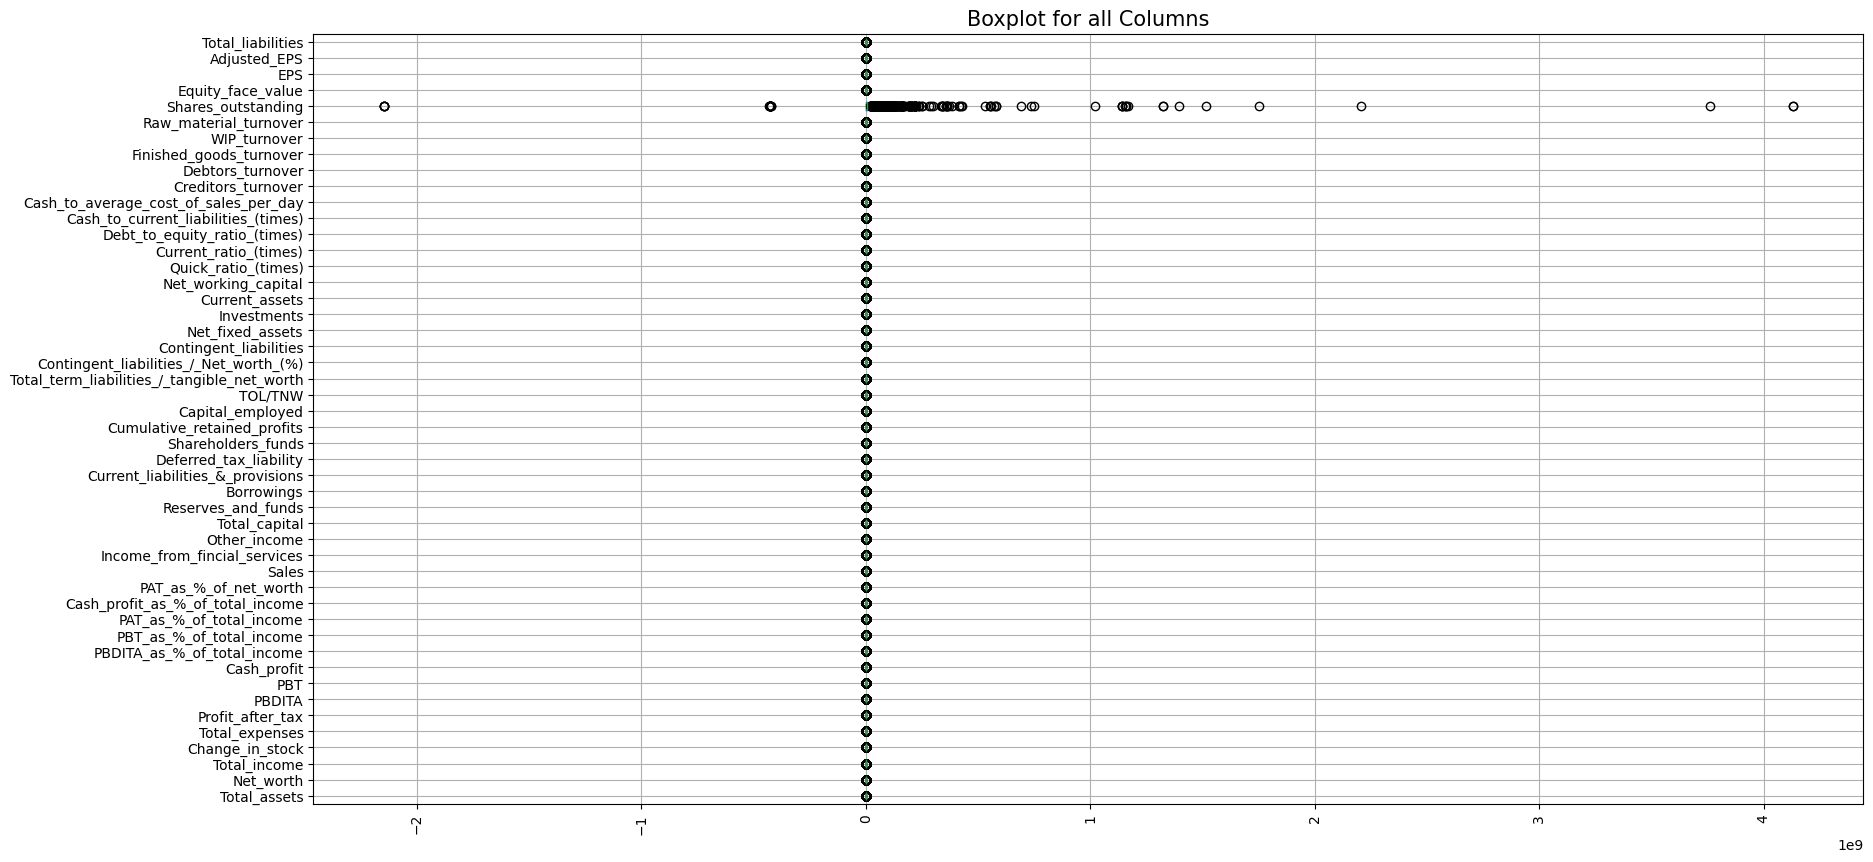

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot for all Columns",fontsize=15)

X.boxplot(vert=0);

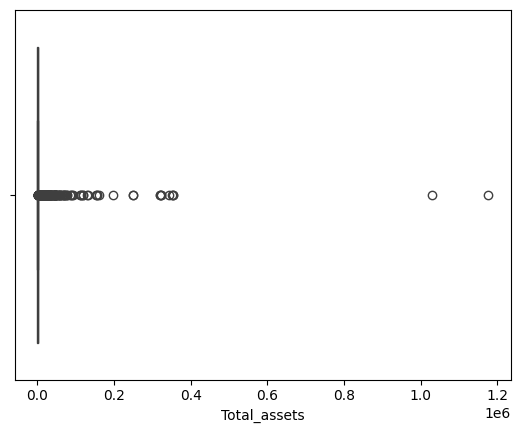

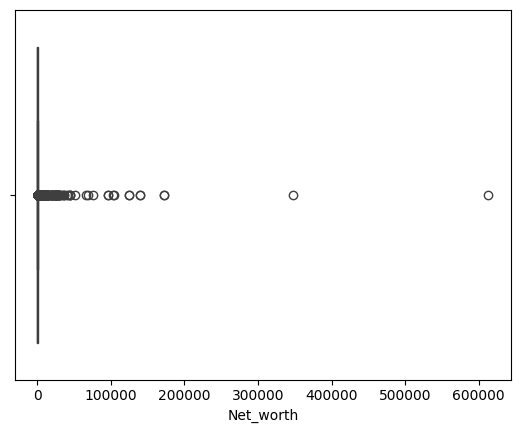

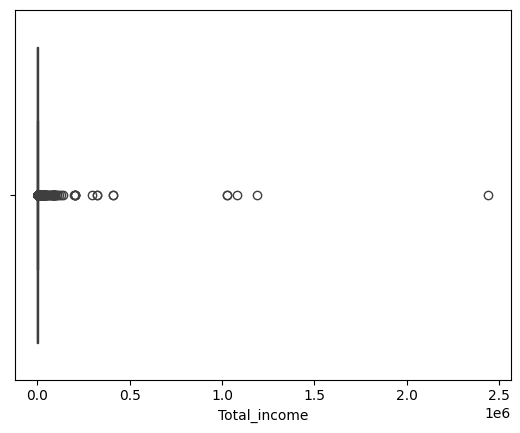

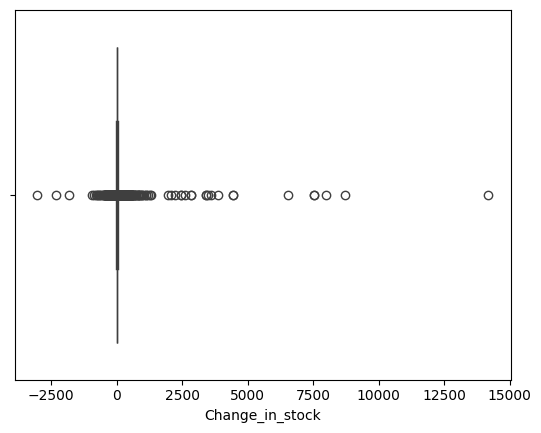

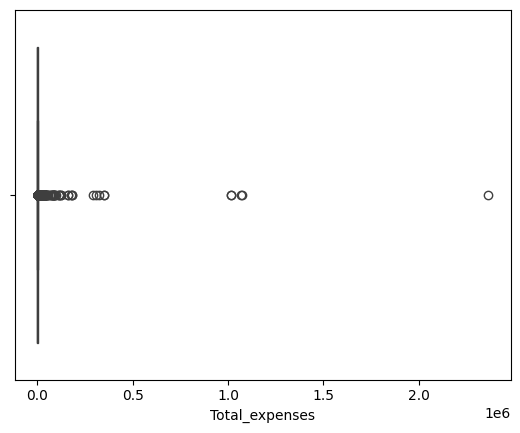

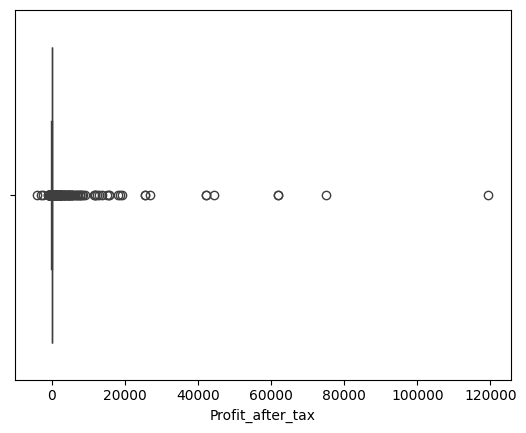

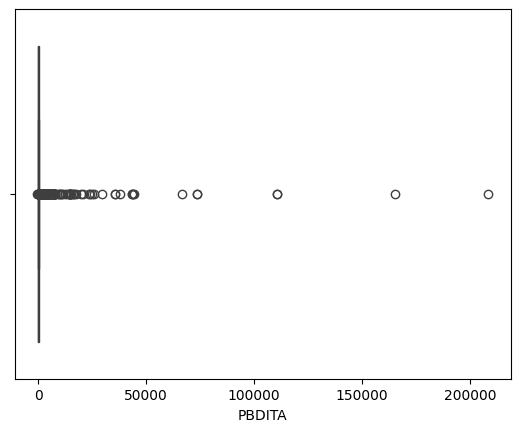

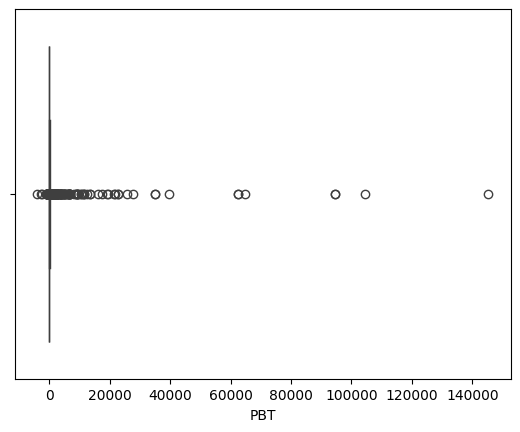

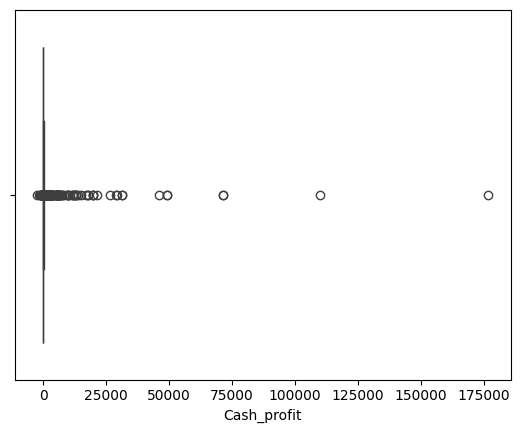

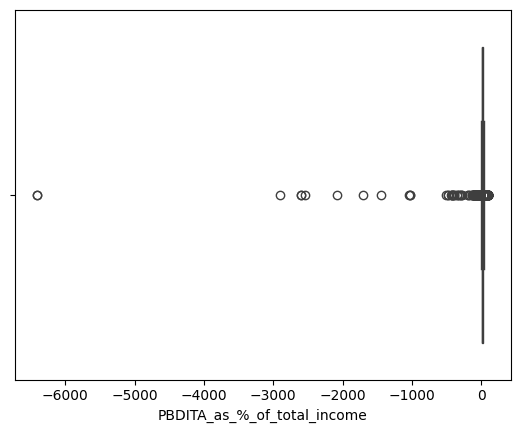

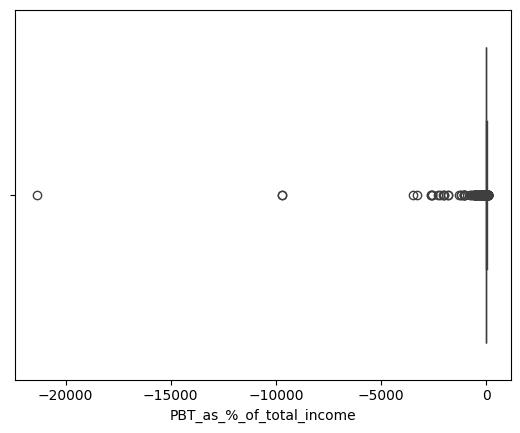

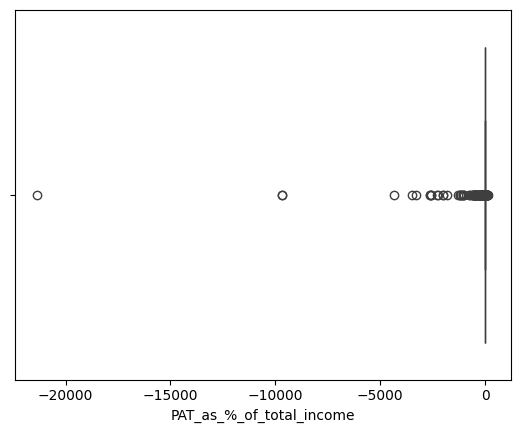

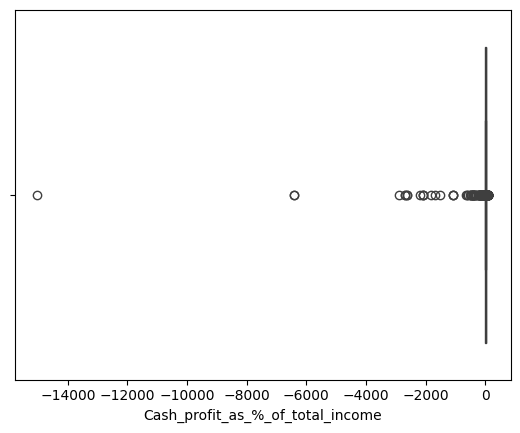

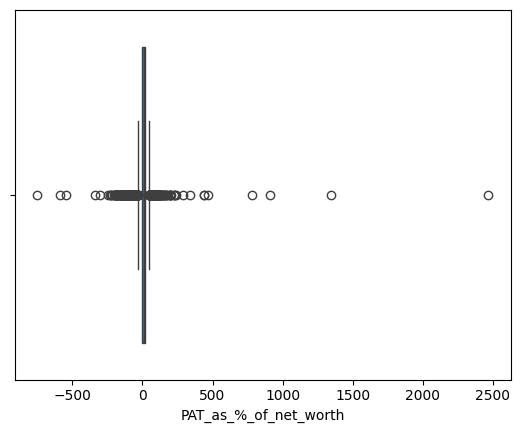

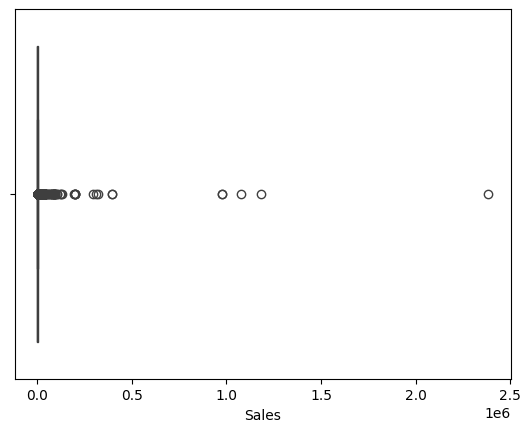

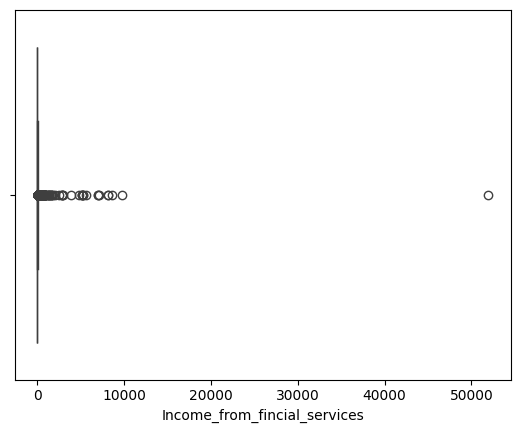

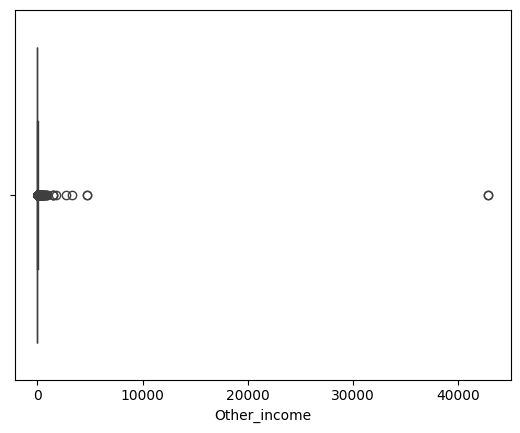

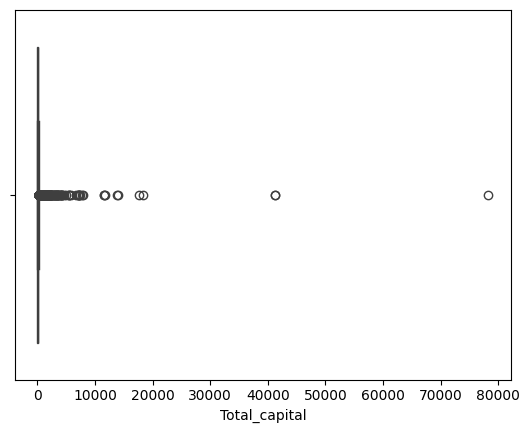

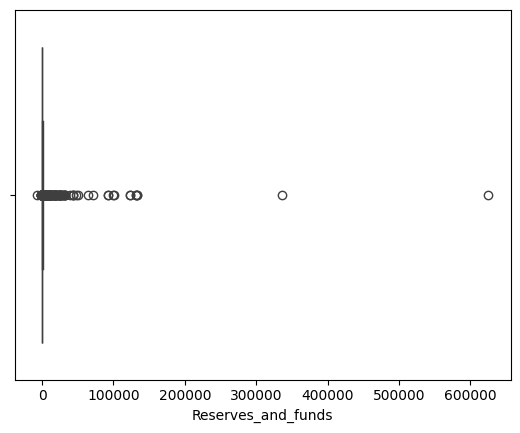

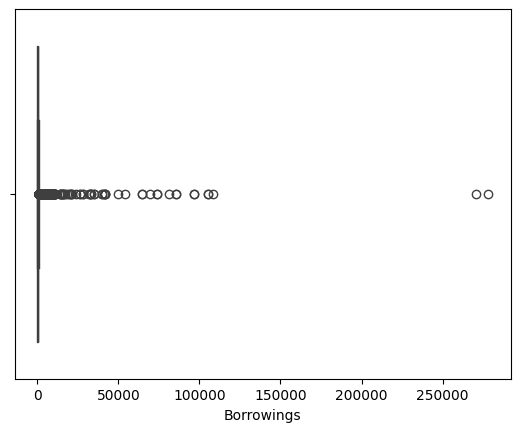

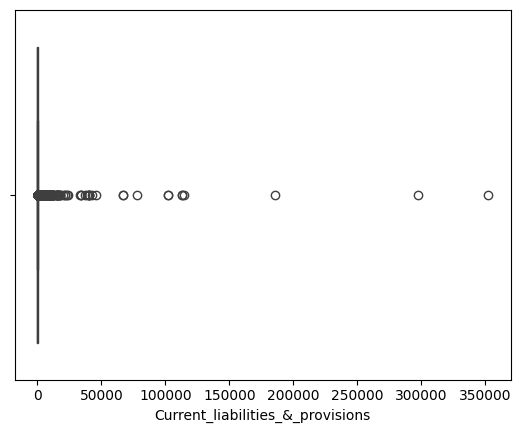

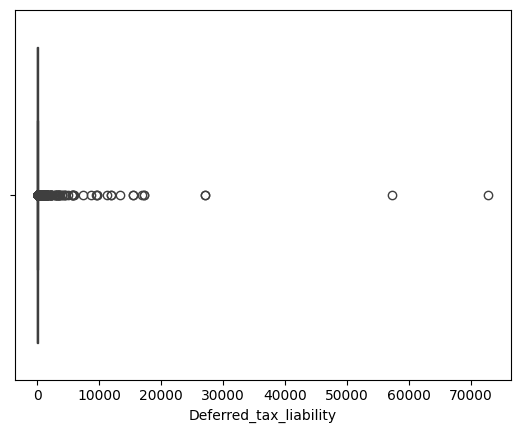

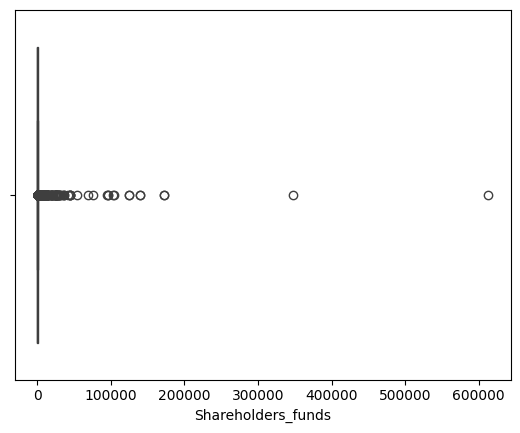

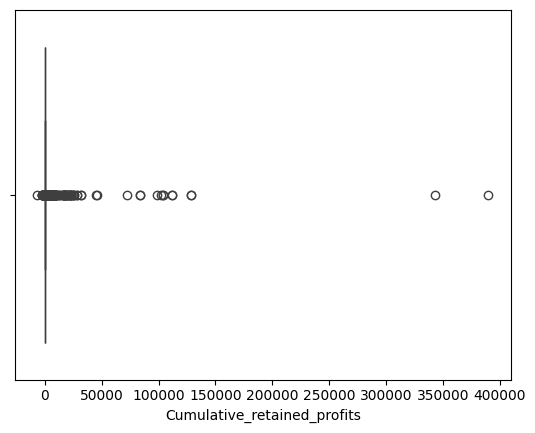

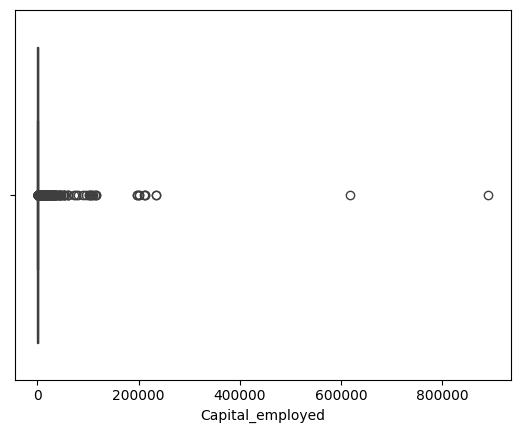

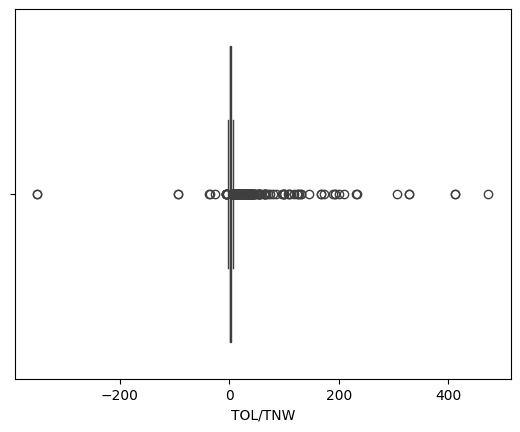

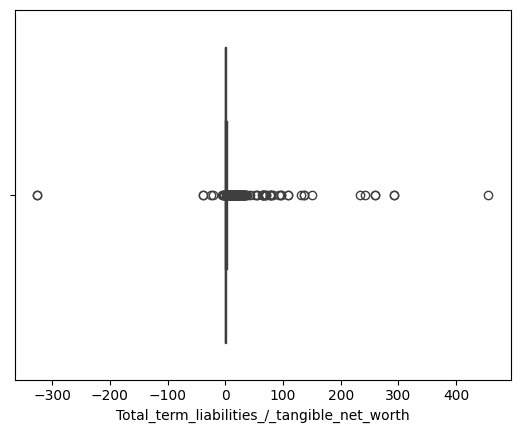

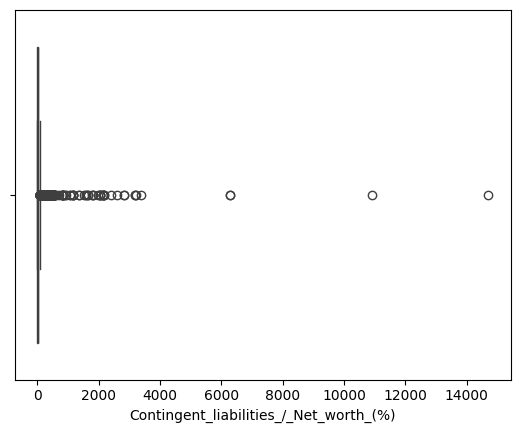

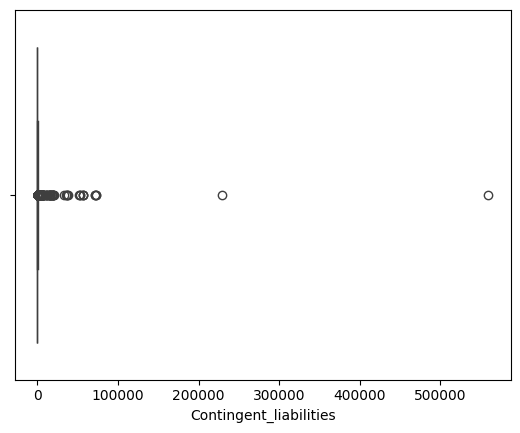

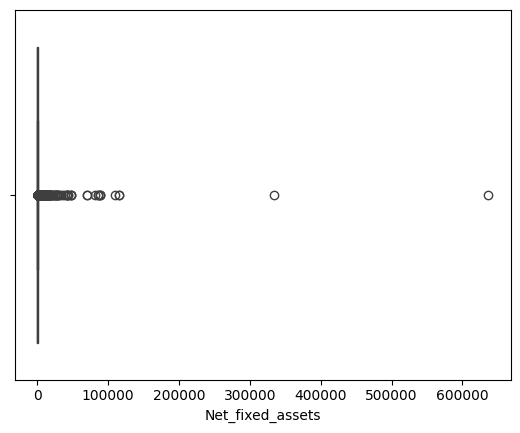

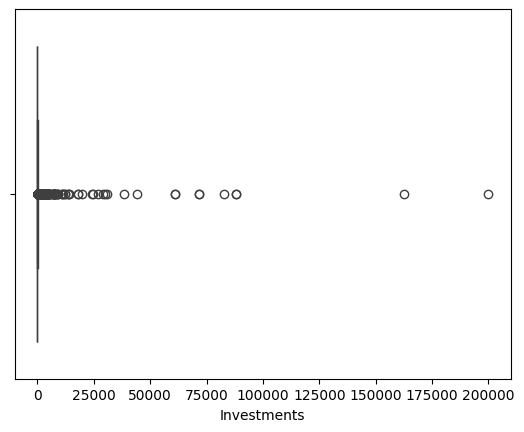

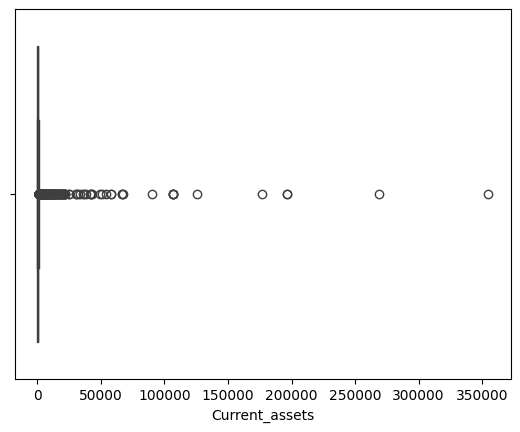

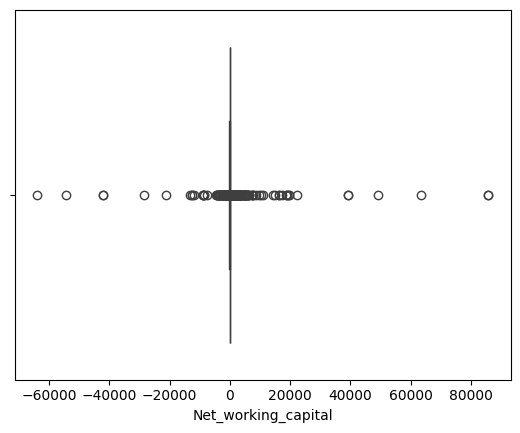

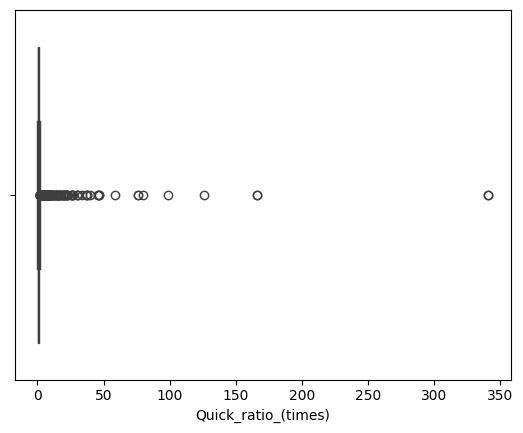

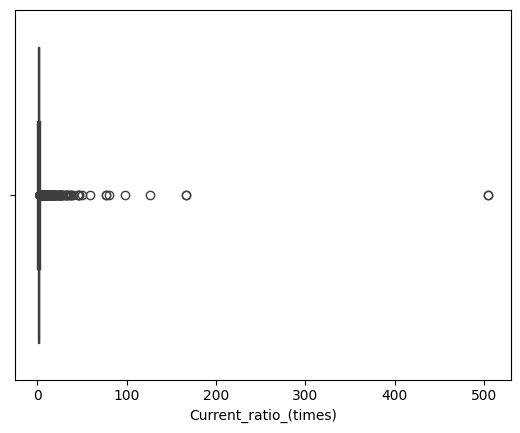

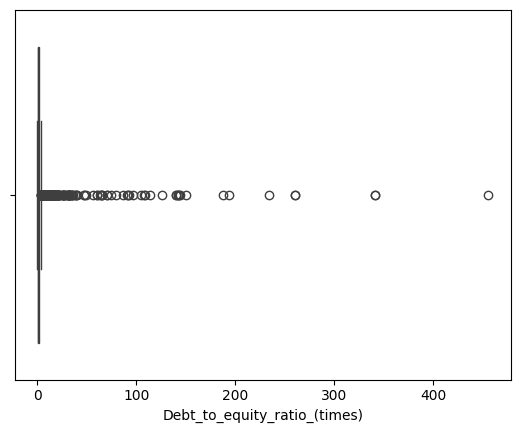

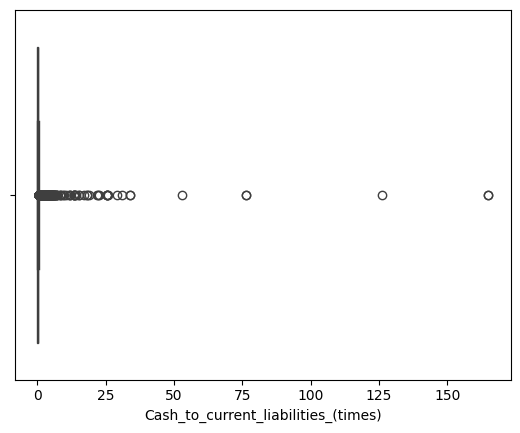

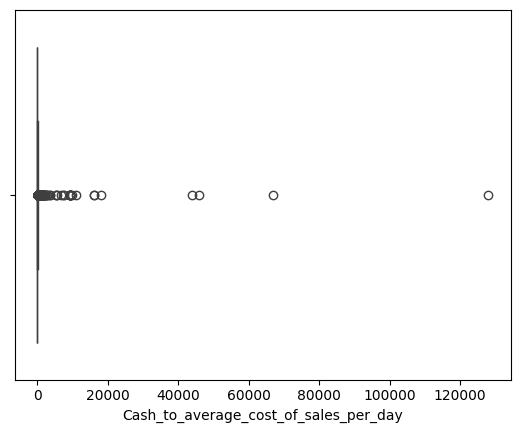

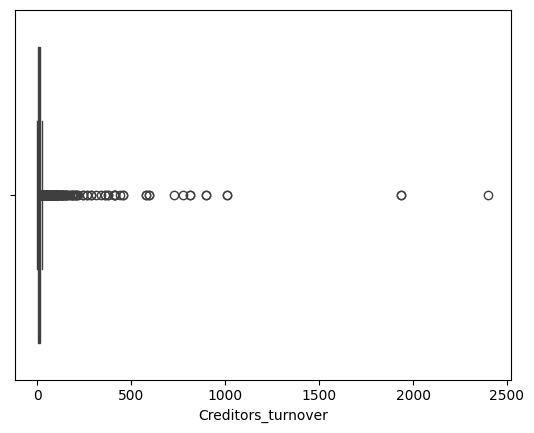

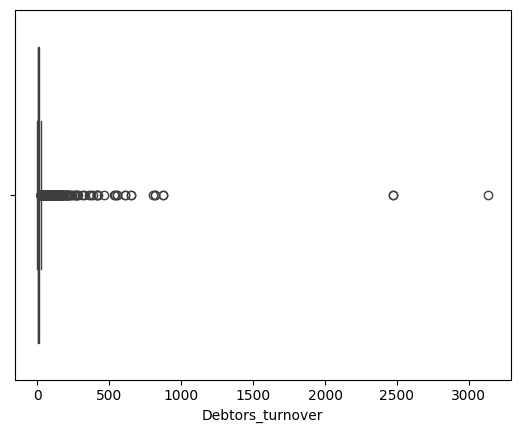

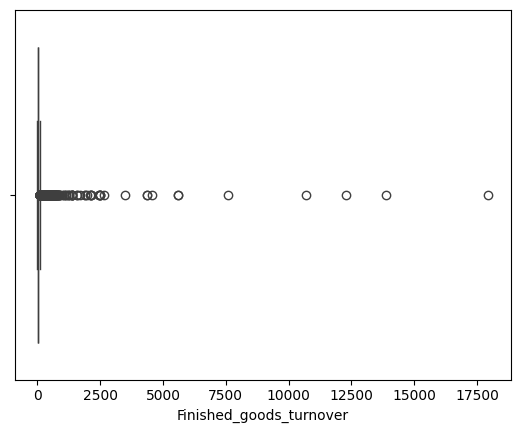

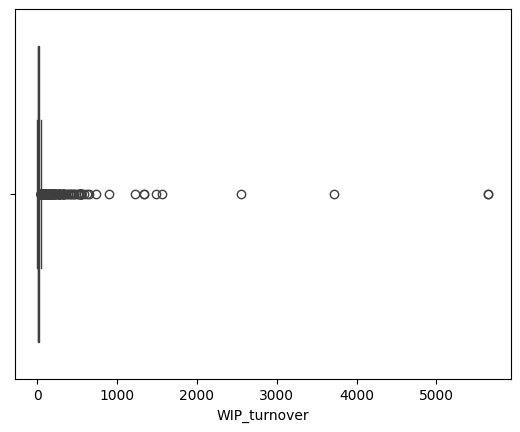

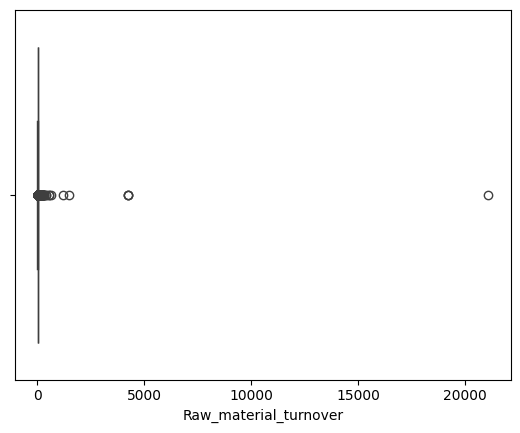

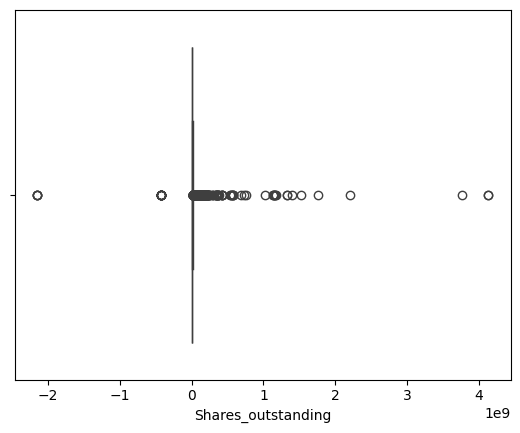

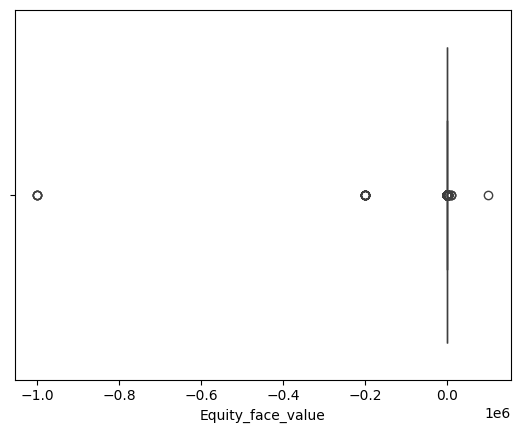

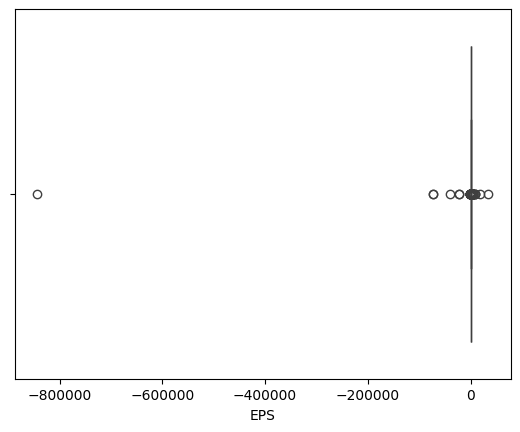

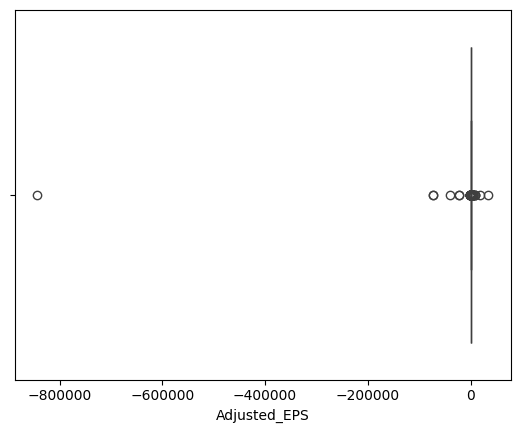

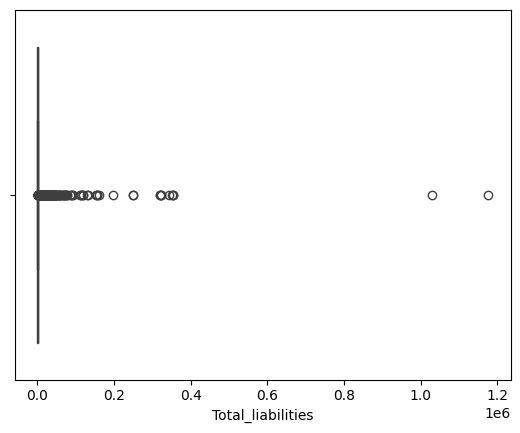

In [37]:
for col in X.columns:
    sns.boxplot(x = X[col])
    plt.show()


In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in X.columns:
    lr,ur=remove_outlier(X[column])
    X[column]=np.where(X[column]>ur,ur,X[column])
    X[column]=np.where(X[column]<lr,lr,X[column])

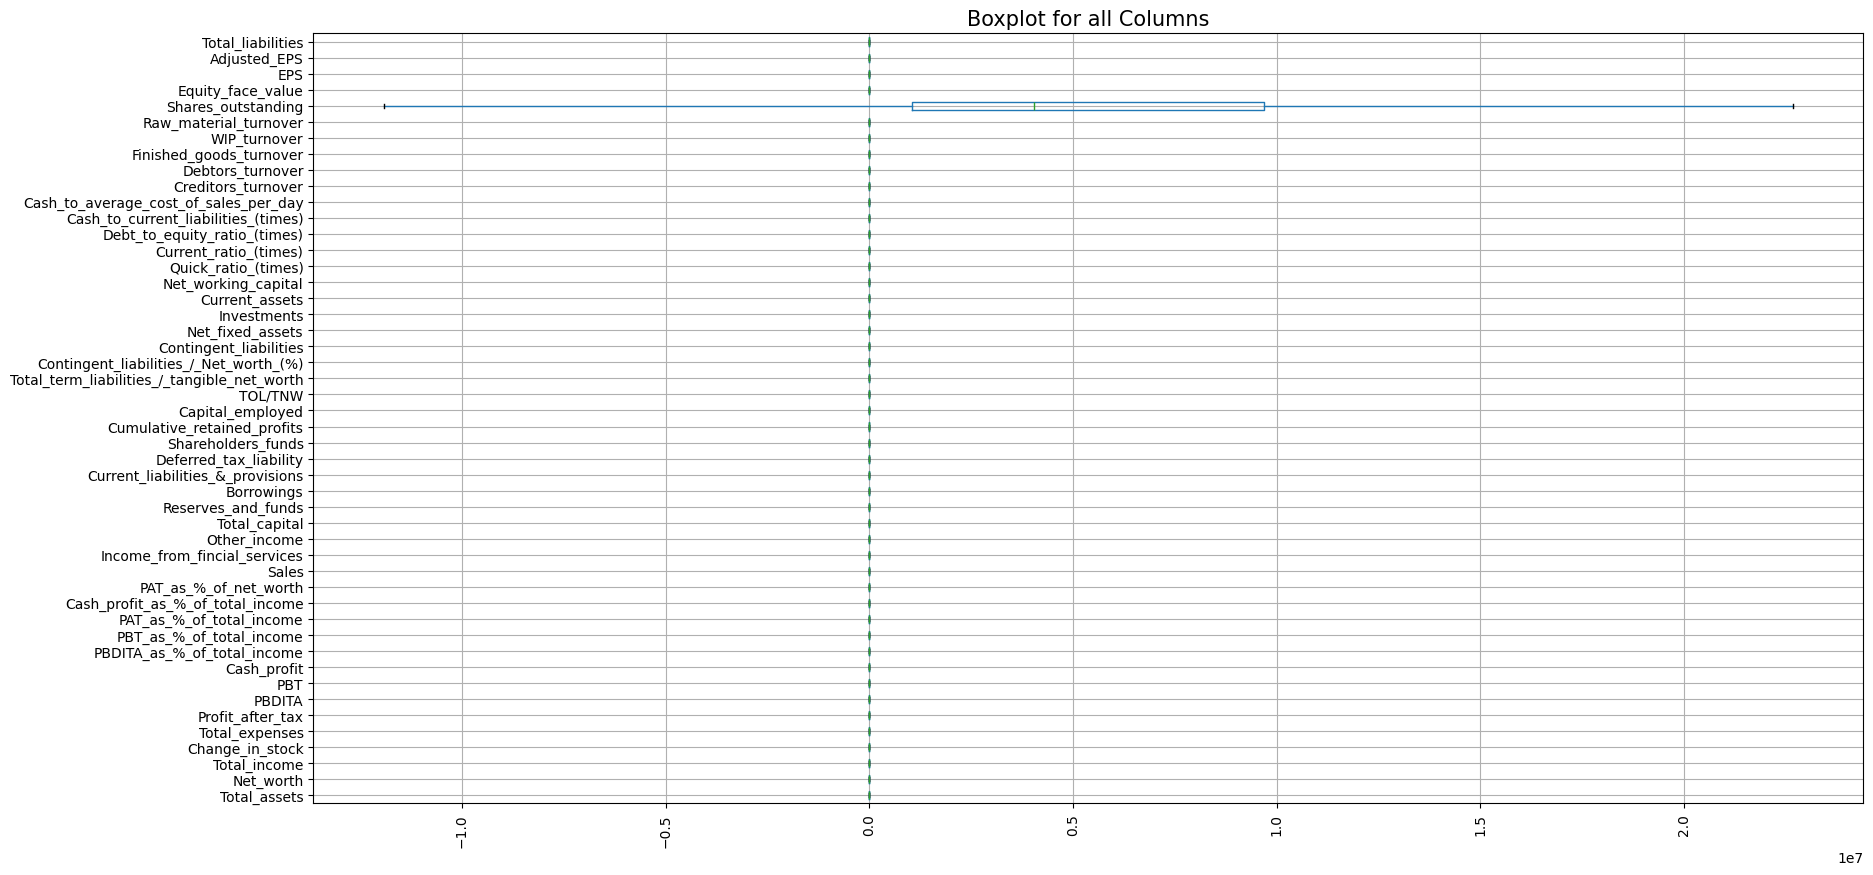

In [40]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot for all Columns",fontsize=15)

X.boxplot(vert=0);

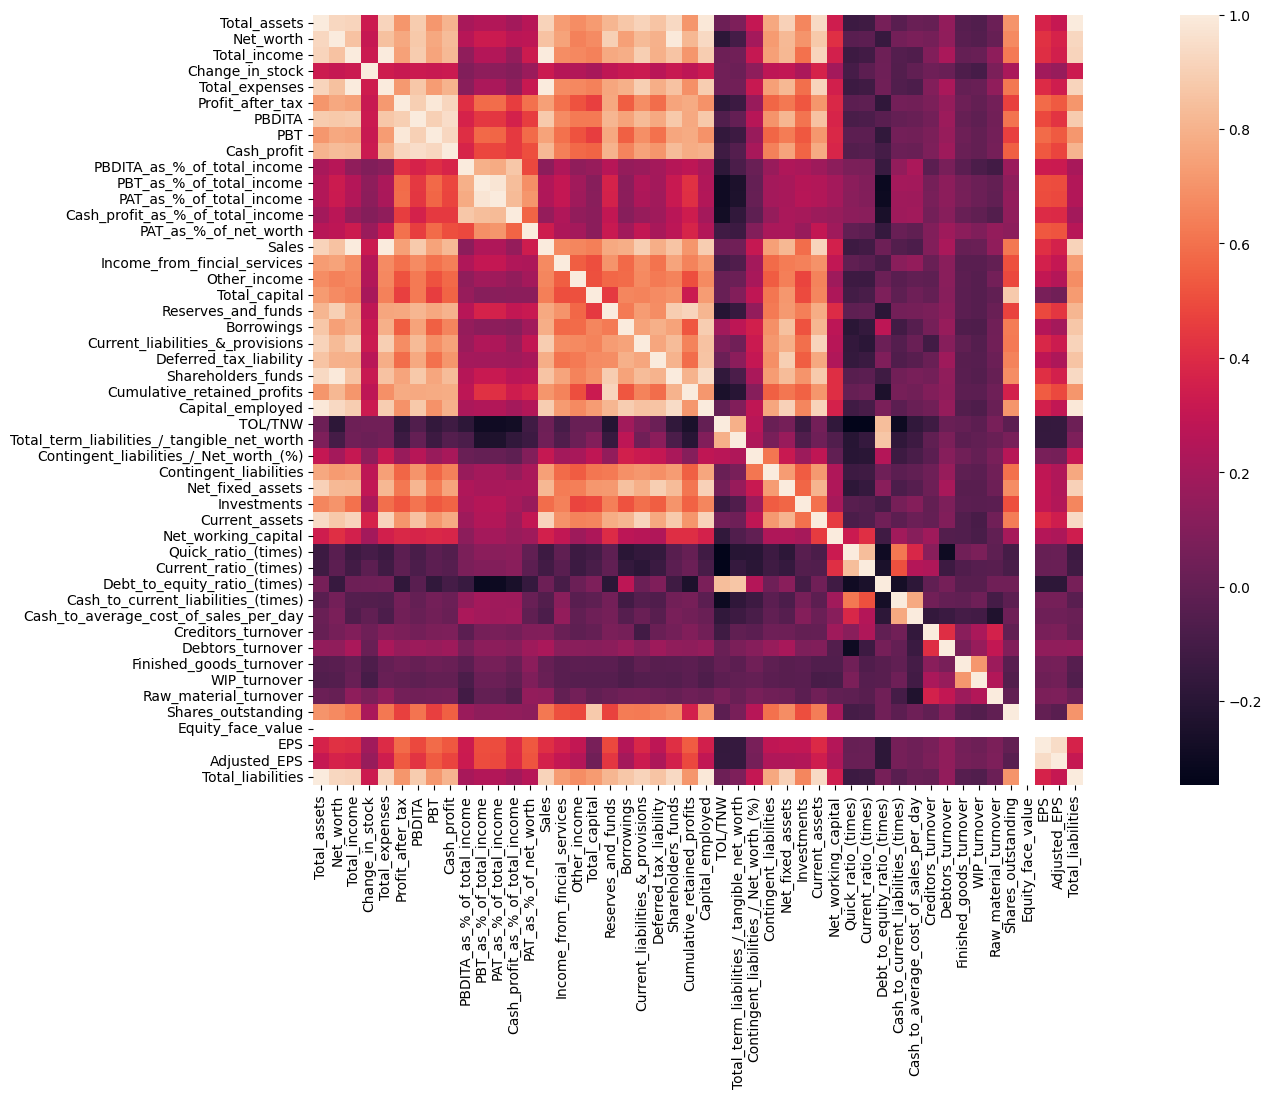

In [41]:
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(),annot=False,square=True);

In [42]:
X.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_%_of_total_income', 'PBT_as_%_of_total_income',
       'PAT_as_%_of_total_income', 'Cash_profit_as_%_of_total_income',
       'PAT_as_%_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL/TNW', 'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_(%)', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_(times)', 'Current_ratio_(times)',
       'Debt_to_equity_ratio_(times)', 'Cash_to_current_liabilities_(times)',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_tu

In [43]:
X.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,827.60,336.5000,534.10,13.5000,508.7000,38.90,124.400,64.6000,95.2,23.29,...,11.600,5.65000,3.990,3.370,14.870,8760056.0,10.0,4.44,4.44,827.60
1,67.70,24.3000,137.90,-3.7000,131.0000,3.20,5.500,1.0000,3.8,3.99,...,9.964,10.98200,66.322,26.206,10.572,1239900.6,10.0,0.00,0.00,67.70
2,238.40,78.9000,331.20,-18.1000,309.2000,3.90,25.800,10.5000,9.4,7.79,...,2.240,2.51000,17.670,8.760,8.350,3155765.2,10.0,0.00,0.00,238.40
3,2665.05,927.4125,3387.72,38.0625,3227.4625,127.55,364.825,175.5625,178.0,4.95,...,3.480,1.91000,18.140,18.620,11.110,10000000.0,10.0,17.60,17.60,2665.05
4,90.90,47.0000,388.60,3.4000,392.7000,-0.70,7.200,-0.6000,3.9,1.85,...,21.670,23.71625,45.870,28.670,19.930,107315.0,10.0,-6.52,-6.52,90.90


In [44]:
y.value_counts()

Default
0    4022
1     234
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [46]:
X.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,0.058649,0.217928,-0.362212,0.411188,-0.367228,0.159964,0.192649,0.310311,0.436732,1.220551,...,0.389972,-0.426775,-0.890990,-0.875719,0.863162,0.249724,0.0,-0.136789,0.002730,0.058649
1,-0.763498,-0.746209,-0.703303,-0.581727,-0.708342,-0.550989,-0.713776,-0.614255,-0.647458,-0.690043,...,0.165845,0.330054,1.165359,0.792035,0.282050,-0.736173,0.0,-0.594367,-0.584052,-0.763498
2,-0.578816,-0.577593,-0.536890,-1.413004,-0.547403,-0.537049,-0.559021,-0.476152,-0.581031,-0.313864,...,-0.892320,-0.872469,-0.439683,-0.482078,-0.018376,-0.485002,0.0,-0.594367,-0.584052,-0.578816
3,2.046613,2.042786,2.094487,1.829122,2.088184,1.925398,2.025511,1.923395,1.418909,-0.595008,...,-0.722444,-0.957634,-0.424178,0.238016,0.354790,0.412281,0.0,1.219457,1.741932,2.046613
4,-0.738398,-0.676106,-0.487474,-0.171861,-0.471992,-0.628656,-0.700816,-0.637515,-0.646272,-0.901891,...,1.769532,2.137566,0.490642,0.971985,1.547301,-0.884656,0.0,-1.266307,-1.445723,-0.738398


In [47]:
df_scaled=pd.concat([X,y],axis=1)

In [48]:
df_scaled.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,Default
0,0.058649,0.217928,-0.362212,0.411188,-0.367228,0.159964,0.192649,0.310311,0.436732,1.220551,...,-0.426775,-0.890990,-0.875719,0.863162,0.249724,0.0,-0.136789,0.002730,0.058649,0
1,-0.763498,-0.746209,-0.703303,-0.581727,-0.708342,-0.550989,-0.713776,-0.614255,-0.647458,-0.690043,...,0.330054,1.165359,0.792035,0.282050,-0.736173,0.0,-0.594367,-0.584052,-0.763498,0
2,-0.578816,-0.577593,-0.536890,-1.413004,-0.547403,-0.537049,-0.559021,-0.476152,-0.581031,-0.313864,...,-0.872469,-0.439683,-0.482078,-0.018376,-0.485002,0.0,-0.594367,-0.584052,-0.578816,0
3,2.046613,2.042786,2.094487,1.829122,2.088184,1.925398,2.025511,1.923395,1.418909,-0.595008,...,-0.957634,-0.424178,0.238016,0.354790,0.412281,0.0,1.219457,1.741932,2.046613,0
4,-0.738398,-0.676106,-0.487474,-0.171861,-0.471992,-0.628656,-0.700816,-0.637515,-0.646272,-0.901891,...,2.137566,0.490642,0.971985,1.547301,-0.884656,0.0,-1.266307,-1.445723,-0.738398,0


In [49]:
df_scaled['Default'].value_counts()

Default
0    4022
1     234
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42,stratify=y)

In [51]:
X_train.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
2954,-0.589418,-0.648004,-0.625391,-0.108361,-0.624080,-0.443450,-0.457629,-0.461615,-0.435128,0.609755,...,-0.664905,-0.193992,-0.750781,-0.611344,-0.134653,-0.726164,0.0,0.086847,0.289514,-0.589418
1990,2.046613,2.042786,2.094487,-1.778853,2.088184,1.925398,2.025511,1.923395,1.986063,1.557132,...,-0.399131,2.137566,0.182183,-0.135907,-0.717388,2.073442,0.0,1.982088,1.931909,2.046613
3733,-0.468136,-0.216582,-0.745573,-0.304634,-0.753228,-0.443450,-0.489647,-0.431087,-0.579845,2.269892,...,-0.438860,-0.915052,2.099040,1.040635,-0.041361,0.527650,0.0,-0.554175,-0.532510,-0.468136
2082,-0.730500,-0.666533,-0.748414,-0.350816,-0.750519,-0.584844,-0.694717,-0.589542,-0.607127,-0.158443,...,-0.999178,-0.526133,2.099040,2.153183,0.149278,-0.093062,0.0,-0.594367,-0.584052,-0.730500
1108,2.046613,2.042786,1.545039,1.829122,1.642250,1.115867,1.427644,1.294479,1.762908,-0.053508,...,-0.034719,-0.580071,-0.257577,-0.507639,-0.018376,0.594184,0.0,0.222884,-0.514008,2.046613


In [52]:
X_test.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
4028,2.046613,2.042786,2.094487,1.829122,2.088184,1.925398,2.025511,1.923395,1.986063,0.038556,...,0.246125,-0.120182,-0.683151,-0.714319,0.204712,2.073442,0.0,0.384686,0.671451,2.046613
2315,-0.741644,-0.804885,-0.549717,-0.108361,-0.528980,-0.789965,-0.735122,-0.755266,-0.741168,-1.000886,...,2.090447,2.137566,-0.222277,0.628736,2.244960,-0.636524,0.0,-1.047824,-1.165548,-0.741644
576,0.416654,0.181488,0.440152,0.191823,0.424280,1.191543,0.745347,1.127301,0.848345,0.244465,...,-0.258024,-0.419678,-0.586490,-0.421461,0.076267,-0.505410,0.0,1.982088,-0.184934,0.416654
572,0.770765,0.854716,1.337389,1.829122,1.437780,0.856977,0.618798,1.031356,0.475877,-0.373261,...,-0.416941,-0.459421,2.099040,2.153183,0.544889,-0.505423,0.0,1.948079,1.931909,0.770765
413,-0.735910,-0.680121,-0.772434,-0.345044,-0.781045,-0.465356,-0.634492,-0.473245,-0.537141,1.647217,...,-0.521059,-0.959053,-0.662367,-0.688758,-0.461850,-0.321699,0.0,-0.988050,-1.088896,-0.735910


In [53]:
X_train_copy=X_train.copy()

In [54]:
y_train.value_counts()

Default
0    2694
1     157
Name: count, dtype: int64

In [55]:
y_test.value_counts()

Default
0    1328
1      77
Name: count, dtype: int64

In [56]:
#Model building
import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [58]:
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
0,Total_assets,inf
47,Total_liabilities,inf
2,Total_income,350.152085
4,Total_expenses,331.201488
14,Sales,242.360115
22,Shareholders_funds,124.888253
1,Net_worth,113.888996
24,Capital_employed,93.527403
7,PBT,52.619278
5,Profit_after_tax,50.499478


In [59]:
X_train = X_train.drop('Total_assets', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
1,Total_income,350.152085
3,Total_expenses,331.201488
13,Sales,242.360115
21,Shareholders_funds,124.888253
46,Total_liabilities,115.538699
0,Net_worth,113.888996
23,Capital_employed,93.527403
6,PBT,52.619278
4,Profit_after_tax,50.499478
5,PBDITA,31.872569


In [60]:
X_train = X_train.drop('Total_income', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
2,Total_expenses,203.295513
12,Sales,196.897140
20,Shareholders_funds,124.675406
45,Total_liabilities,115.002050
0,Net_worth,113.649253
22,Capital_employed,93.243801
5,PBT,52.619275
3,Profit_after_tax,50.268170
8,PBT_as_%_of_total_income,28.437392
9,PAT_as_%_of_total_income,27.324137


In [61]:
X_train = X_train.drop('Total_expenses', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
19,Shareholders_funds,124.359877
44,Total_liabilities,114.867944
0,Net_worth,113.641002
21,Capital_employed,93.232275
4,PBT,52.008428
2,Profit_after_tax,49.213837
7,PBT_as_%_of_total_income,28.342031
8,PAT_as_%_of_total_income,27.296337
3,PBDITA,26.705433
28,Current_assets,20.500380


In [62]:
X_train = X_train.drop('Shareholders_funds', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
43,Total_liabilities,114.859994
20,Capital_employed,89.407950
4,PBT,51.949722
2,Profit_after_tax,49.193320
7,PBT_as_%_of_total_income,28.341920
8,PAT_as_%_of_total_income,27.289029
3,PBDITA,26.612013
0,Net_worth,24.174148
27,Current_assets,20.449245
5,Cash_profit,20.070308


In [63]:
X_train = X_train.drop('Total_liabilities', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
4,PBT,51.511101
2,Profit_after_tax,48.908760
20,Capital_employed,37.991051
7,PBT_as_%_of_total_income,28.335503
8,PAT_as_%_of_total_income,27.287520
3,PBDITA,26.439224
0,Net_worth,24.173872
5,Cash_profit,20.040821
27,Current_assets,19.807341
11,Sales,12.956314


In [64]:
X_train = X_train.drop('PBT', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
19,Capital_employed,37.632270
3,PBDITA,25.404048
0,Net_worth,24.088809
6,PBT_as_%_of_total_income,23.683122
7,PAT_as_%_of_total_income,23.269717
4,Cash_profit,19.982936
26,Current_assets,19.748505
10,Sales,12.887173
14,Reserves_and_funds,12.615941
2,Profit_after_tax,11.832038


In [65]:
X_train = X_train.drop('Capital_employed', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
3,PBDITA,24.831504
6,PBT_as_%_of_total_income,23.673531
7,PAT_as_%_of_total_income,23.203076
4,Cash_profit,19.966615
25,Current_assets,18.221134
0,Net_worth,17.192563
10,Sales,12.811422
14,Reserves_and_funds,12.610869
2,Profit_after_tax,11.599636
16,Current_liabilities_&_provisions,11.413515


In [66]:
X_train = X_train.drop('PBDITA', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
5,PBT_as_%_of_total_income,23.497297
6,PAT_as_%_of_total_income,23.119689
24,Current_assets,18.072421
0,Net_worth,17.022156
3,Cash_profit,13.624128
13,Reserves_and_funds,12.609775
9,Sales,12.587757
15,Current_liabilities_&_provisions,11.360272
38,EPS,11.205050
2,Profit_after_tax,10.751386


In [67]:
X_train = X_train.drop('PBT_as_%_of_total_income', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
23,Current_assets,18.064414
0,Net_worth,17.022128
3,Cash_profit,13.607493
12,Reserves_and_funds,12.609524
8,Sales,12.506194
14,Current_liabilities_&_provisions,11.359133
37,EPS,11.203890
2,Profit_after_tax,10.735185
38,Adjusted_EPS,10.099836
21,Net_fixed_assets,9.571433


In [68]:
X_train = X_train.drop('Current_assets', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
0,Net_worth,16.535378
3,Cash_profit,13.565467
12,Reserves_and_funds,12.607394
36,EPS,11.203821
8,Sales,10.762254
2,Profit_after_tax,10.714262
37,Adjusted_EPS,10.099729
21,Net_fixed_assets,9.570960
16,Cumulative_retained_profits,8.574580
14,Current_liabilities_&_provisions,8.549359


In [69]:
X_train = X_train.drop('Net_worth', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
2,Cash_profit,13.435810
35,EPS,11.203023
7,Sales,10.759052
1,Profit_after_tax,10.714074
11,Reserves_and_funds,10.317862
36,Adjusted_EPS,10.083832
20,Net_fixed_assets,9.563001
15,Cumulative_retained_profits,8.545460
13,Current_liabilities_&_provisions,8.251960
5,Cash_profit_as_%_of_total_income,6.758537


In [70]:
X_train = X_train.drop('Cash_profit', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
34,EPS,11.201078
10,Reserves_and_funds,10.317794
6,Sales,10.195462
35,Adjusted_EPS,10.080603
19,Net_fixed_assets,9.244321
14,Cumulative_retained_profits,8.512650
12,Current_liabilities_&_provisions,8.237771
24,Debt_to_equity_ratio_(times),6.329958
22,Quick_ratio_(times),6.015411
9,Total_capital,5.997664


In [71]:
X_train = X_train.drop('EPS', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
10,Reserves_and_funds,10.312410
6,Sales,10.194313
19,Net_fixed_assets,9.230782
14,Cumulative_retained_profits,8.509165
12,Current_liabilities_&_provisions,8.228747
24,Debt_to_equity_ratio_(times),6.329488
22,Quick_ratio_(times),6.014887
9,Total_capital,5.996003
4,Cash_profit_as_%_of_total_income,5.780178
13,Deferred_tax_liability,5.667255


In [72]:
X_train = X_train.drop('Reserves_and_funds', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
6,Sales,10.194274
18,Net_fixed_assets,8.922814
11,Current_liabilities_&_provisions,8.153539
23,Debt_to_equity_ratio_(times),6.304594
21,Quick_ratio_(times),6.014193
9,Total_capital,5.936003
4,Cash_profit_as_%_of_total_income,5.779515
12,Deferred_tax_liability,5.667150
31,Shares_outstanding,5.572827
3,PAT_as_%_of_total_income,5.382955


In [73]:
X_train = X_train.drop('Sales', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
17,Net_fixed_assets,8.876154
22,Debt_to_equity_ratio_(times),6.279498
20,Quick_ratio_(times),6.010953
8,Total_capital,5.935083
4,Cash_profit_as_%_of_total_income,5.765417
10,Current_liabilities_&_provisions,5.685026
11,Deferred_tax_liability,5.653989
30,Shares_outstanding,5.567414
3,PAT_as_%_of_total_income,5.351924
13,TOL/TNW,5.152039


In [74]:
X_train = X_train.drop('Net_fixed_assets', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
21,Debt_to_equity_ratio_(times),6.272254
19,Quick_ratio_(times),6.010610
8,Total_capital,5.870110
4,Cash_profit_as_%_of_total_income,5.722853
10,Current_liabilities_&_provisions,5.649239
29,Shares_outstanding,5.565028
3,PAT_as_%_of_total_income,5.343341
13,TOL/TNW,5.135456
2,PBDITA_as_%_of_total_income,4.977079
20,Current_ratio_(times),4.893295


In [75]:
X_train = X_train.drop('Debt_to_equity_ratio_(times)', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
19,Quick_ratio_(times),6.010096
8,Total_capital,5.862680
4,Cash_profit_as_%_of_total_income,5.663612
10,Current_liabilities_&_provisions,5.566999
28,Shares_outstanding,5.557842
3,PAT_as_%_of_total_income,5.342305
2,PBDITA_as_%_of_total_income,4.931502
20,Current_ratio_(times),4.889746
1,Profit_after_tax,4.553262
16,Contingent_liabilities,4.328999


In [76]:
# X_train = X_train.drop('Debt_to_equity_ratio_(times)', axis=1)
# calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

In [77]:
X_train = X_train.drop('Quick_ratio_(times)', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
8,Total_capital,5.862151
4,Cash_profit_as_%_of_total_income,5.655784
10,Current_liabilities_&_provisions,5.557553
27,Shares_outstanding,5.556478
3,PAT_as_%_of_total_income,5.338357
2,PBDITA_as_%_of_total_income,4.928008
1,Profit_after_tax,4.551766
16,Contingent_liabilities,4.318144
12,Cumulative_retained_profits,4.138627
13,TOL/TNW,4.077164


In [78]:
X_train = X_train.drop('Total_capital', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
4,Cash_profit_as_%_of_total_income,5.654341
9,Current_liabilities_&_provisions,5.448673
3,PAT_as_%_of_total_income,5.310624
2,PBDITA_as_%_of_total_income,4.916444
1,Profit_after_tax,4.536218
15,Contingent_liabilities,4.306528
12,TOL/TNW,4.067880
10,Deferred_tax_liability,4.013646
8,Borrowings,4.007330
19,Cash_to_current_liabilities_(times),3.846122


In [79]:
X_train = X_train.drop('Cash_profit_as_%_of_total_income', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
8,Current_liabilities_&_provisions,5.442567
3,PAT_as_%_of_total_income,4.730087
1,Profit_after_tax,4.534422
14,Contingent_liabilities,4.304246
11,TOL/TNW,4.047307
9,Deferred_tax_liability,4.007745
7,Borrowings,4.000036
18,Cash_to_current_liabilities_(times),3.831181
10,Cumulative_retained_profits,3.821049
12,Total_term_liabilities_/_tangible_net_worth,3.598642


In [80]:
X_train = X_train.drop('Current_liabilities_&_provisions', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

,variables,VIF
3,PAT_as_%_of_total_income,4.713617
1,Profit_after_tax,4.432863
13,Contingent_liabilities,4.213604
8,Deferred_tax_liability,3.855737
7,Borrowings,3.835356
17,Cash_to_current_liabilities_(times),3.828593
10,TOL/TNW,3.744878
9,Cumulative_retained_profits,3.742320
11,Total_term_liabilities_/_tangible_net_worth,3.411503
18,Cash_to_average_cost_of_sales_per_day,3.223387


In [81]:
X_train.shape

(2851, 27)

In [82]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Change_in_stock,2851.0,0.005052,0.985248,-1.778853,-0.420090,-0.315025,0.477575,1.829122
Profit_after_tax,2851.0,-0.016632,0.986779,-2.129225,-0.608741,-0.457390,0.342183,1.925398
PBDITA_as_%_of_total_income,2851.0,0.001735,0.997835,-2.339291,-0.611837,-0.128744,0.517690,2.269892
PAT_as_%_of_total_income,2851.0,-0.003810,0.990568,-1.999181,-0.486150,-0.150104,0.512054,2.039985
PAT_as_%_of_net_worth,2851.0,0.005467,0.987614,-2.252236,-0.583539,-0.142463,0.507036,2.197622
Income_from_fincial_services,2851.0,-0.029650,0.983412,-0.756316,-0.706058,-0.578740,0.265583,1.974331
Other_income,2851.0,-0.013118,0.997666,-0.833464,-0.737672,-0.514155,0.347978,2.056280
Borrowings,2851.0,-0.021000,0.989186,-0.801447,-0.741814,-0.505241,0.289425,2.047759
Deferred_tax_liability,2851.0,-0.021759,0.982348,-0.780956,-0.722012,-0.521474,0.316237,2.042914
Cumulative_retained_profits,2851.0,-0.006473,0.987739,-2.121331,-0.608586,-0.432646,0.378272,1.911327


In [83]:


# Bringing together X and y as its required for the Statsmodel
train_XY = pd.concat([X_train,y_train], axis=1)
test_XY = pd.concat([X_test,y_test], axis=1)



In [84]:
train_XY.head()

,Change_in_stock,Profit_after_tax,PBDITA_as_%_of_total_income,PAT_as_%_of_total_income,PAT_as_%_of_net_worth,Income_from_fincial_services,Other_income,Borrowings,Deferred_tax_liability,Cumulative_retained_profits,...,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,Adjusted_EPS,Default
2954,-0.108361,-0.443450,0.609755,0.096550,0.396079,-0.722811,-0.769602,-0.426917,-0.063376,-0.632510,...,-0.817087,-0.664905,-0.193992,-0.750781,-0.611344,-0.134653,-0.726164,0.0,0.289514,0
1990,-1.778853,1.925398,1.557132,1.808229,2.197622,1.974331,2.056280,2.047759,2.042914,1.911327,...,-0.485865,-0.399131,2.137566,0.182183,-0.135907,-0.717388,2.073442,0.0,1.931909,0
3733,-0.304634,-0.443450,2.269892,1.074889,-0.335744,1.974331,-0.578017,-0.499544,-0.396538,-0.378818,...,1.020470,-0.438860,-0.915052,2.099040,1.040635,-0.041361,0.527650,0.0,-0.532510,0
2082,-0.350816,-0.584844,-0.158443,-0.237840,-0.416140,-0.739563,-0.622720,-0.752317,-0.588747,-0.607589,...,-0.824066,-0.999178,-0.526133,2.099040,2.153183,0.149278,-0.093062,0.0,-0.584052,0
1108,1.829122,1.115867,-0.053508,-0.004429,-0.314268,1.773302,0.731149,0.028073,2.042914,1.911327,...,0.382720,-0.034719,-0.580071,-0.257577,-0.507639,-0.018376,0.594184,0.0,-0.514008,0


In [85]:
test_XY.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_%_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,Default
4028,2.046613,2.042786,2.094487,1.829122,2.088184,1.925398,2.025511,1.923395,1.986063,0.038556,...,-0.120182,-0.683151,-0.714319,0.204712,2.073442,0.0,0.384686,0.671451,2.046613,0
2315,-0.741644,-0.804885,-0.549717,-0.108361,-0.528980,-0.789965,-0.735122,-0.755266,-0.741168,-1.000886,...,2.137566,-0.222277,0.628736,2.244960,-0.636524,0.0,-1.047824,-1.165548,-0.741644,1
576,0.416654,0.181488,0.440152,0.191823,0.424280,1.191543,0.745347,1.127301,0.848345,0.244465,...,-0.419678,-0.586490,-0.421461,0.076267,-0.505410,0.0,1.982088,-0.184934,0.416654,0
572,0.770765,0.854716,1.337389,1.829122,1.437780,0.856977,0.618798,1.031356,0.475877,-0.373261,...,-0.459421,2.099040,2.153183,0.544889,-0.505423,0.0,1.948079,1.931909,0.770765,0
413,-0.735910,-0.680121,-0.772434,-0.345044,-0.781045,-0.465356,-0.634492,-0.473245,-0.537141,1.647217,...,-0.959053,-0.662367,-0.688758,-0.461850,-0.321699,0.0,-0.988050,-1.088896,-0.735910,0


In [86]:
train_XY.shape

(2851, 28)

In [87]:
test_XY.shape

(1405, 49)

In [88]:
train_XY.columns

Index(['Change_in_stock', 'Profit_after_tax', 'PBDITA_as_%_of_total_income',
       'PAT_as_%_of_total_income', 'PAT_as_%_of_net_worth',
       'Income_from_fincial_services', 'Other_income', 'Borrowings',
       'Deferred_tax_liability', 'Cumulative_retained_profits', 'TOL/TNW',
       'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_(%)', 'Contingent_liabilities',
       'Investments', 'Net_working_capital', 'Current_ratio_(times)',
       'Cash_to_current_liabilities_(times)',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Equity_face_value',
       'Adjusted_EPS', 'Default'],
      dtype='object')

In [89]:
test_XY.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_%_of_total_income', 'PBT_as_%_of_total_income',
       'PAT_as_%_of_total_income', 'Cash_profit_as_%_of_total_income',
       'PAT_as_%_of_net_worth', 'Sales', 'Income_from_fincial_services',
       'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL/TNW', 'Total_term_liabilities_/_tangible_net_worth',
       'Contingent_liabilities_/_Net_worth_(%)', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_(times)', 'Current_ratio_(times)',
       'Debt_to_equity_ratio_(times)', 'Cash_to_current_liabilities_(times)',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_tu

In [90]:
X_train.shape

(2851, 27)

In [91]:
X_train.corr()

,Change_in_stock,Profit_after_tax,PBDITA_as_%_of_total_income,PAT_as_%_of_total_income,PAT_as_%_of_net_worth,Income_from_fincial_services,Other_income,Borrowings,Deferred_tax_liability,Cumulative_retained_profits,...,Cash_to_current_liabilities_(times),Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,Adjusted_EPS
Change_in_stock,1.000000,0.298473,0.078867,0.119829,0.174671,0.258204,0.247872,0.309392,0.267847,0.259108,...,-0.068074,-0.024119,0.032976,0.037696,-0.070151,-0.102252,0.089247,0.207975,NaN,0.158115
Profit_after_tax,0.298473,1.000000,0.397897,0.574417,0.594149,0.594599,0.504004,0.521003,0.578540,0.770091,...,0.040015,0.029046,0.080324,0.161545,0.035045,0.000271,0.058677,0.453040,NaN,0.531622
PBDITA_as_%_of_total_income,0.078867,0.397897,1.000000,0.767770,0.482144,0.228557,0.139275,0.137096,0.191076,0.263489,...,0.144838,0.228279,-0.035842,0.063224,-0.028664,-0.087084,-0.106084,0.162287,NaN,0.307025
PAT_as_%_of_total_income,0.119829,0.574417,0.767770,1.000000,0.706096,0.296860,0.178880,0.104637,0.178722,0.397330,...,0.183880,0.166129,0.064435,0.133668,0.074065,0.037158,0.006486,0.146484,NaN,0.478881
PAT_as_%_of_net_worth,0.174671,0.594149,0.482144,0.706096,1.000000,0.222499,0.206330,0.178036,0.203538,0.358642,...,0.005662,-0.025921,0.092393,0.187826,0.148212,0.109242,0.163564,0.133507,NaN,0.528320
Income_from_fincial_services,0.258204,0.594599,0.228557,0.296860,0.222499,1.000000,0.551886,0.566522,0.603701,0.644627,...,0.108630,0.139746,0.032984,0.136856,-0.036024,-0.043360,0.009591,0.511776,NaN,0.288696
Other_income,0.247872,0.504004,0.139275,0.178880,0.206330,0.551886,1.000000,0.584370,0.636384,0.499898,...,-0.031824,-0.017290,-0.017662,0.123580,-0.032197,-0.049780,0.063093,0.492796,NaN,0.243315
Borrowings,0.309392,0.521003,0.137096,0.104637,0.178036,0.566522,0.584370,1.000000,0.784084,0.513206,...,-0.114484,-0.054607,0.071269,0.172362,-0.071186,-0.084618,0.053133,0.614048,NaN,0.191639
Deferred_tax_liability,0.267847,0.578540,0.191076,0.178722,0.203538,0.603701,0.636384,0.784084,1.000000,0.598756,...,-0.072128,-0.048164,0.027837,0.195800,-0.039034,-0.044829,0.034651,0.642791,NaN,0.229187
Cumulative_retained_profits,0.259108,0.770091,0.263489,0.397330,0.358642,0.644627,0.499898,0.513206,0.598756,1.000000,...,0.041861,0.025647,0.099289,0.138116,-0.023698,-0.039778,0.034494,0.349962,NaN,0.485544


In [92]:
cols_str = " + ".join(X_train.columns)
print(cols_str)  

Change_in_stock + Profit_after_tax + PBDITA_as_%_of_total_income + PAT_as_%_of_total_income + PAT_as_%_of_net_worth + Income_from_fincial_services + Other_income + Borrowings + Deferred_tax_liability + Cumulative_retained_profits + TOL/TNW + Total_term_liabilities_/_tangible_net_worth + Contingent_liabilities_/_Net_worth_(%) + Contingent_liabilities + Investments + Net_working_capital + Current_ratio_(times) + Cash_to_current_liabilities_(times) + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Equity_face_value + Adjusted_EPS


In [93]:
from patsy.builtins import *


In [94]:
f_1= 'Default ~ Change_in_stock + Profit_after_tax + Q("PBDITA_as_%_of_total_income") + Q("PAT_as_%_of_total_income")+ Q("PAT_as_%_of_net_worth") + Income_from_fincial_services + Other_income + Borrowings  + Deferred_tax_liability + Cumulative_retained_profits + Q("TOL/TNW") + Q("Total_term_liabilities_/_tangible_net_worth") + Q("Contingent_liabilities_/_Net_worth_(%)") + Contingent_liabilities + Investments + Net_working_capital  + Q("Current_ratio_(times)") + Q("Cash_to_current_liabilities_(times)") + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding  + Adjusted_EPS'


In [95]:
model_1 = SM.logit(formula = f_1, data= train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.123428
         Iterations 10


In [96]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2824
Method:                           MLE   Df Model:                           26
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                  0.4210
Time:                        00:17:41   Log-Likelihood:                -351.89
converged:                       True   LL-Null:                       -607.77
Covariance Type:            nonrobust   LLR p-value:                 1.294e-91
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -5.3361      0.343    -15.571      0.000      -6.008      -4.664
Change_in_stock                                      0.3530      0.157      2.249      0.024       0.045       0.661
Profit_after_tax                                    -0.2866      0.273     -1.048      0.295      -0.822       0.249
Q("PBDITA_as_%_of_total_income")                    -0.1559      0.116     -1.343      0.179      -0.383       0.072
Q("PAT_as_%_of_total_income")                       -0.2049      0.180     -1.137      0.255      -0.558       0.148
Q("PAT_as_%_of_net_worth")                          -0.3488      0.152     -2.298      0.022      -0.646      -0.051
Income_from_fincial_services                         0.0779      0.214      0.364      0.716      -0.342       0.497
Other_income                                         0.2508      0.175      1.429      0.153      -0.093       0.595
Borrowings                                          -0.0565      0.301     -0.188      0.851      -0.647       0.533
Deferred_tax_liability                              -0.2321      0.293     -0.791      0.429      -0.807       0.343
Cumulative_retained_profits                         -1.1502      0.320     -3.598      0.000      -1.777      -0.524
Q("TOL/TNW")                                         0.7807      0.139      5.604      0.000       0.508       1.054
Q("Total_term_liabilities_/_tangible_net_worth")    -0.1639      0.135     -1.211      0.226      -0.429       0.101
Q("Contingent_liabilities_/_Net_worth_(%)")          0.1985      0.111      1.790      0.073      -0.019       0.416
Contingent_liabilities                              -0.5355      0.246     -2.181      0.029      -1.017      -0.054
Investments                                         -0.1661      0.197     -0.843      0.399      -0.552       0.220
Net_working_capital                                 -0.1234      0.173     -0.713      0.476      -0.463       0.216
Q("Current_ratio_(times)")                          -0.1523      0.132     -1.156      0.247      -0.410       0.106
Q("Cash_to_current_liabilities_(times)")             0.3367      0.165      2.047      0.041       0.014       0.659
Cash_to_average_cost_of_sales_per_day                0.0741      0.132      0.561      0.575      -0.185       0.333
Creditors_turnover                                  -0.2774      0.155     -1.794      0.073      -0.580       0.026
Debtors_turnover                                    -0.1179      0.132     -0.896      0.370      -0.376       0.140
Finished_goods_turnover                              0.0609      0.161      0.378      0.705      -0.254       0.376
WIP_turnover                                         0.0908      0.156      0.581      0.561      -0.216       0.397
Raw_material_turnover                               -0.2220      0.137     -1.623 

In [97]:
f_2= 'Default ~  Q("PAT_as_%_of_net_worth")+ Cumulative_retained_profits + Q("TOL/TNW")+ Contingent_liabilities + Q("Cash_to_current_liabilities_(times)") + Adjusted_EPS'



In [98]:
model_2 = SM.logit(formula = f_2, data= train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.132376
         Iterations 10


In [99]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2844
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                  0.3790
Time:                        00:17:41   Log-Likelihood:                -377.40
converged:                       True   LL-Null:                       -607.77
Covariance Type:            nonrobust   LLR p-value:                 2.411e-96
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.8491      0.264    -18.359      0.000      -5.367      -4.331
Q("PAT_as_%_of_net_worth")                  -0.6332      0.113     -5.628      0.000      -0.854      -0.413
Cumulative_retained_profits                 -1.1074      0.226     -4.897      0.000      -1.551      -0.664
Q("TOL/TNW")                                 0.7264      0.085      8.513      0.000       0.559       0.894
Contingent_liabilities                      -0.5224      0.157     -3.320      0.001      -0.831      -0.214
Q("Cash_to_current_liabilities_(times)")     0.2839      0.101      2.800      0.005       0.085       0.483
Adjusted_EPS                                -0.9534      0.183     -5.211      0.000      -1.312      -0.595
============================================================================================================
"""

In [100]:
y_prob_pred_train = model_2.predict(train_XY)

In [101]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

In [102]:
from sklearn import metrics

              precision    recall  f1-score   support

           0      0.957     0.988     0.973      2694
           1      0.551     0.242     0.336       157

    accuracy                          0.947      2851
   macro avg      0.754     0.615     0.654      2851
weighted avg      0.935     0.947     0.938      2851



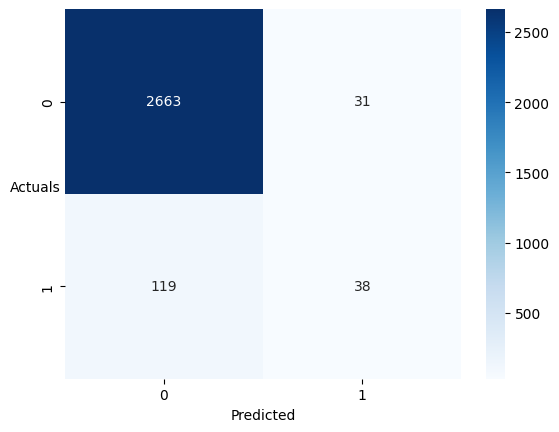

In [103]:
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [104]:

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

In [105]:


optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold



0.04422249684980148

In [106]:


# Validating on the train set wit revised Threshold

# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.04422249684980148:
        a=1
    else:
        a=0
    y_pred.append(a)



              precision    recall  f1-score   support

           0      0.989     0.804     0.887      2694
           1      0.202     0.854     0.327       157

    accuracy                          0.806      2851
   macro avg      0.596     0.829     0.607      2851
weighted avg      0.946     0.806     0.856      2851



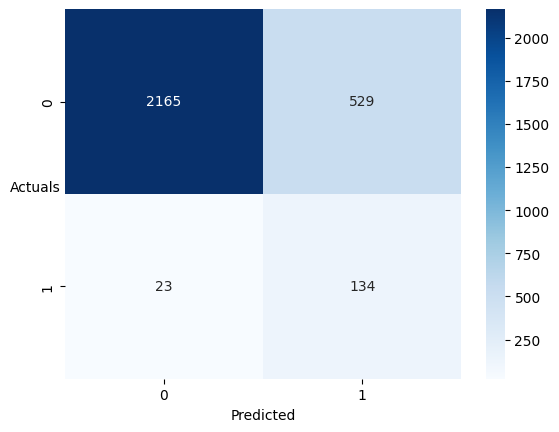

In [107]:

print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [108]:


# # calculating ROC curve for rfcl1 model
# from sklearn.metrics import roc_curve, roc_auc_score

# # Compute probabilities of positive class (class 1) for the test set
# probs_train = model_2.predict_proba(X_train)[:, 1]
# # calculate AUC
# auc = roc_auc_score(y_train, probs_train)
# print('AUC: %.3f' % auc)

# # Compute the false positive rate, true positive rate, and threshold for the ROC curve
# fpr, tpr, thresholds = roc_curve(y_train, probs_train)

# # Compute the area under the ROC curve
# roc_auc = roc_auc_score(y_train, probs_train)

# # Plot the ROC curve
# import matplotlib.pyplot as plt

# plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
# plt.xlabel('False Positive Rate');


In [109]:
y_prob_pred_test = model_2.predict(test_XY)

In [110]:


# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.04422249684980148:
        a=1
    else:
        a=0
    y_pred_test.append(a)



              precision    recall  f1-score   support

           0      0.992     0.805     0.889      1328
           1      0.208     0.883     0.337        77

    accuracy                          0.809      1405
   macro avg      0.600     0.844     0.613      1405
weighted avg      0.949     0.809     0.858      1405



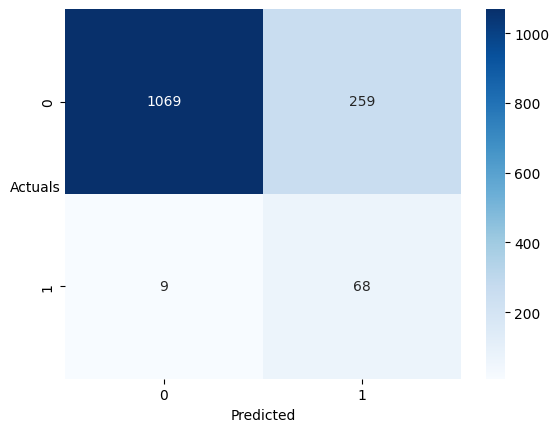

In [111]:
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=3))

sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);



In [112]:



# # calculating ROC curve for rfcl1 model
# from sklearn.metrics import roc_curve, roc_auc_score

# # Compute probabilities of positive class (class 1) for the test set
# probs_train = model_2.predict_proba(X_test)[:, 1]
# # calculate AUC
# auc = roc_auc_score(y_test, probs_train)
# print('AUC: %.3f' % auc)

# # Compute the false positive rate, true positive rate, and threshold for the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, probs_train)

# # Compute the area under the ROC curve
# roc_auc = roc_auc_score(y_test, probs_train)

# # Plot the ROC curve
# import matplotlib.pyplot as plt

# plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
# plt.xlabel('False Positive Rate');




In [113]:
# random forest
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score
from sklearn.metrics import recall_score
import optuna

In [569]:
# Define objective function
def objective_rf(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 25, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 65)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 100)
    

    # Create and fit random forest model
    model_rf = RandomForestClassifier(
    # n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,n_jobs = -1
    )
    model_rf.fit(X_train_copy, y_train)

    # Make predictions and calculate RMSE
    y_pred = model_rf.predict(X_test)
    
    return recall_score(y_test, y_pred)




In [570]:
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective_rf, n_trials=300,show_progress_bar=True,n_jobs = -1)

[I 2023-12-18 02:04:23,005] A new study created in memory with name: no-name-7b57db68-2ec8-4653-a662-a99fb3f1c67b


[I 2023-12-18 02:04:24,850] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 26, 'min_samples_leaf': 98}. Best is trial 0 with value: 0.0.
[I 2023-12-18 02:04:24,863] Trial 4 finished with value: 0.0 and parameters: {'n_estimators': 21, 'max_depth': 2, 'min_samples_split': 37, 'min_samples_leaf': 38}. Best is trial 0 with value: 0.0.
[I 2023-12-18 02:04:24,875] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 13, 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 29}. Best is trial 0 with value: 0.0.
[I 2023-12-18 02:04:24,880] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 18, 'max_depth': 2, 'min_samples_split': 33, 'min_samples_leaf': 76}. Best is trial 0 with value: 0.0.


Best trial: 8. Best value: 0.350649:   2%|▊                                            | 5/300 [00:02<01:56,  2.53it/s]

[I 2023-12-18 02:04:24,885] Trial 2 finished with value: 0.16883116883116883 and parameters: {'n_estimators': 15, 'max_depth': 4, 'min_samples_split': 60, 'min_samples_leaf': 42}. Best is trial 2 with value: 0.16883116883116883.
[I 2023-12-18 02:04:24,886] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 16, 'max_depth': 2, 'min_samples_split': 24, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.16883116883116883.


[I 2023-12-18 02:04:24,888] Trial 6 finished with value: 0.0 and parameters: {'n_estimators': 19, 'max_depth': 2, 'min_samples_split': 61, 'min_samples_leaf': 20}. Best is trial 2 with value: 0.16883116883116883.


Best trial: 8. Best value: 0.350649:   3%|█▏                                           | 8/300 [00:02<01:06,  4.41it/s]

[I 2023-12-18 02:04:24,924] Trial 7 finished with value: 0.0 and parameters: {'n_estimators': 15, 'max_depth': 3, 'min_samples_split': 26, 'min_samples_leaf': 56}. Best is trial 2 with value: 0.16883116883116883.
[I 2023-12-18 02:04:24,925] Trial 11 finished with value: 0.19480519480519481 and parameters: {'n_estimators': 12, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 11 with value: 0.19480519480519481.


Best trial: 8. Best value: 0.350649:   3%|█▍                                          | 10/300 [00:02<00:57,  5.01it/s]

[I 2023-12-18 02:04:24,953] Trial 10 finished with value: 0.0 and parameters: {'n_estimators': 21, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 61}. Best is trial 11 with value: 0.19480519480519481.
[I 2023-12-18 02:04:24,956] Trial 8 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 2}. Best is trial 8 with value: 0.35064935064935066.


Best trial: 8. Best value: 0.350649:   4%|█▊                                          | 12/300 [00:03<00:52,  5.52it/s]

[I 2023-12-18 02:04:24,957] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 10, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 50}. Best is trial 8 with value: 0.35064935064935066.


Best trial: 14. Best value: 0.363636:   4%|█▊                                         | 13/300 [00:03<01:25,  3.34it/s]

[I 2023-12-18 02:04:26,701] Trial 13 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 10, 'max_depth': 4, 'min_samples_split': 44, 'min_samples_leaf': 41}. Best is trial 8 with value: 0.35064935064935066.
[I 2023-12-18 02:04:26,705] Trial 12 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 18, 'max_depth': 4, 'min_samples_split': 45, 'min_samples_leaf': 6}. Best is trial 8 with value: 0.35064935064935066.


[I 2023-12-18 02:04:26,809] Trial 14 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:27,137] Trial 16 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:27,157] Trial 15 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:27,344] Trial 17 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:27,483] Trial 18 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:   7%|██▊                                        | 20/300 [00:05<00:56,  4.95it/s]

[I 2023-12-18 02:04:27,759] Trial 19 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:27,961] Trial 20 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:   7%|███▏                                       | 22/300 [00:05<00:48,  5.70it/s]

[I 2023-12-18 02:04:28,072] Trial 21 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:28,179] Trial 23 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:   8%|███▍                                       | 24/300 [00:05<00:45,  6.10it/s]

[I 2023-12-18 02:04:28,244] Trial 22 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:   8%|███▌                                       | 25/300 [00:06<01:01,  4.50it/s]

[I 2023-12-18 02:04:28,847] Trial 24 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:28,970] Trial 25 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:29,040] Trial 26 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:   9%|████                                       | 28/300 [00:06<00:54,  5.03it/s]

[I 2023-12-18 02:04:29,294] Trial 28 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 19}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:29,362] Trial 27 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 21}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  10%|████▎                                      | 30/300 [00:06<00:48,  5.56it/s]

[I 2023-12-18 02:04:29,658] Trial 29 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 25, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 25}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  10%|████▍                                      | 31/300 [00:07<00:53,  5.00it/s]

[I 2023-12-18 02:04:29,892] Trial 30 finished with value: 0.24675324675324675 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 18}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:29,944] Trial 31 finished with value: 0.24675324675324675 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 16}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  11%|████▋                                      | 33/300 [00:07<00:52,  5.09it/s]

[I 2023-12-18 02:04:30,253] Trial 32 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 20}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:30,296] Trial 33 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 20}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  12%|█████                                      | 35/300 [00:07<00:43,  6.03it/s]

[I 2023-12-18 02:04:30,555] Trial 34 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 17}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:30,580] Trial 35 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 55, 'min_samples_leaf': 17}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  12%|█████▎                                     | 37/300 [00:07<00:40,  6.55it/s]

[I 2023-12-18 02:04:30,802] Trial 36 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 57, 'min_samples_leaf': 18}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  13%|█████▍                                     | 38/300 [00:08<00:49,  5.25it/s]

[I 2023-12-18 02:04:31,117] Trial 38 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 55, 'min_samples_leaf': 19}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:31,204] Trial 37 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 55, 'min_samples_leaf': 19}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:31,328] Trial 40 finished with value: 0.0 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 82}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  14%|██████                                     | 42/300 [00:08<00:41,  6.20it/s]

[I 2023-12-18 02:04:31,354] Trial 39 finished with value: 0.0 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 37, 'min_samples_leaf': 86}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:31,728] Trial 41 finished with value: 0.0 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 98}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  14%|██████▏                                    | 43/300 [00:09<00:51,  4.95it/s]

[I 2023-12-18 02:04:32,102] Trial 42 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:32,190] Trial 43 finished with value: 0.0 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 38, 'min_samples_leaf': 93}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  15%|██████▍                                    | 45/300 [00:09<00:58,  4.39it/s]

[I 2023-12-18 02:04:32,606] Trial 44 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:32,609] Trial 45 finished with value: 0.0 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 99}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  16%|██████▋                                    | 47/300 [00:10<00:45,  5.53it/s]

[I 2023-12-18 02:04:32,827] Trial 46 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 65, 'min_samples_leaf': 77}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:32,866] Trial 47 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 95}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  16%|███████                                    | 49/300 [00:10<00:40,  6.13it/s]

[I 2023-12-18 02:04:32,911] Trial 48 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 89}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  17%|███████▏                                   | 50/300 [00:10<00:54,  4.62it/s]

[I 2023-12-18 02:04:33,473] Trial 49 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:33,608] Trial 50 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  17%|███████▍                                   | 52/300 [00:11<00:49,  4.97it/s]

[I 2023-12-18 02:04:33,862] Trial 51 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:33,880] Trial 52 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  18%|███████▋                                   | 54/300 [00:11<00:44,  5.47it/s]

[I 2023-12-18 02:04:34,022] Trial 53 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 65, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:34,258] Trial 54 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  19%|████████                                   | 56/300 [00:11<00:49,  4.92it/s]

[I 2023-12-18 02:04:34,656] Trial 55 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  19%|████████▏                                  | 57/300 [00:12<00:58,  4.15it/s]

[I 2023-12-18 02:04:34,907] Trial 56 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 33}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:35,052] Trial 57 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 33}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  20%|████████▍                                  | 59/300 [00:12<00:43,  5.48it/s]

[I 2023-12-18 02:04:35,221] Trial 58 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 32}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:35,324] Trial 60 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 34}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  20%|████████▋                                  | 61/300 [00:12<00:43,  5.54it/s]

[I 2023-12-18 02:04:35,396] Trial 59 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 35}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  21%|████████▉                                  | 62/300 [00:12<00:44,  5.32it/s]

[I 2023-12-18 02:04:35,768] Trial 62 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 33}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:35,858] Trial 61 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 32}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  21%|█████████▏                                 | 64/300 [00:13<00:53,  4.42it/s]

[I 2023-12-18 02:04:36,247] Trial 64 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 33}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:36,279] Trial 63 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 24, 'min_samples_leaf': 9}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  22%|█████████▍                                 | 66/300 [00:13<00:42,  5.52it/s]

[I 2023-12-18 02:04:36,468] Trial 65 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:36,563] Trial 67 finished with value: 0.0 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 42, 'min_samples_leaf': 29}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  23%|█████████▋                                 | 68/300 [00:13<00:33,  7.01it/s]

[I 2023-12-18 02:04:36,563] Trial 66 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 30}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:36,915] Trial 69 finished with value: 0.0 and parameters: {'n_estimators': 18, 'max_depth': 2, 'min_samples_split': 27, 'min_samples_leaf': 66}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  23%|██████████                                 | 70/300 [00:14<00:30,  7.55it/s]

[I 2023-12-18 02:04:36,966] Trial 68 finished with value: 0.0 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 28, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:37,048] Trial 70 finished with value: 0.0 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 27, 'min_samples_leaf': 9}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  24%|██████████▎                                | 72/300 [00:14<00:45,  5.06it/s]

[I 2023-12-18 02:04:37,422] Trial 71 finished with value: 0.0 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 28, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:37,548] Trial 72 finished with value: 0.0 and parameters: {'n_estimators': 21, 'max_depth': 2, 'min_samples_split': 27, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:37,636] Trial 73 finished with value: 0.0 and parameters: {'n_estimators': 17, 'max_depth': 2, 'min_samples_split': 25, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  25%|██████████▊                                | 75/300 [00:15<00:41,  5.48it/s]

[I 2023-12-18 02:04:38,001] Trial 74 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 26, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  25%|██████████▉                                | 76/300 [00:15<01:00,  3.68it/s]

[I 2023-12-18 02:04:38,470] Trial 75 finished with value: 0.0 and parameters: {'n_estimators': 21, 'max_depth': 2, 'min_samples_split': 50, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:38,781] Trial 76 finished with value: 0.19480519480519481 and parameters: {'n_estimators': 21, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  26%|███████████▏                               | 78/300 [00:16<01:00,  3.65it/s]

[I 2023-12-18 02:04:38,977] Trial 77 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 21, 'max_depth': 3, 'min_samples_split': 49, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:39,101] Trial 78 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:39,305] Trial 79 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:39,407] Trial 80 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  27%|███████████▊                               | 82/300 [00:16<00:38,  5.62it/s]

[I 2023-12-18 02:04:39,429] Trial 81 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:39,624] Trial 82 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  28%|████████████                               | 84/300 [00:17<00:34,  6.24it/s]

[I 2023-12-18 02:04:39,860] Trial 83 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 50, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:39,911] Trial 85 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 50, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  29%|████████████▎                              | 86/300 [00:17<00:33,  6.42it/s]

[I 2023-12-18 02:04:39,913] Trial 84 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 50, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:40,145] Trial 86 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  29%|████████████▌                              | 88/300 [00:17<00:40,  5.24it/s]

[I 2023-12-18 02:04:40,483] Trial 87 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  30%|████████████▊                              | 89/300 [00:17<00:46,  4.49it/s]

[I 2023-12-18 02:04:40,845] Trial 88 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  30%|█████████████                              | 91/300 [00:18<00:50,  4.15it/s]

[I 2023-12-18 02:04:41,277] Trial 90 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:41,296] Trial 89 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  31%|█████████████▏                             | 92/300 [00:18<00:45,  4.60it/s]

[I 2023-12-18 02:04:41,592] Trial 91 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:41,833] Trial 92 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 24}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:41,853] Trial 93 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 24}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  32%|█████████████▊                             | 96/300 [00:19<00:33,  6.02it/s]

[I 2023-12-18 02:04:41,941] Trial 94 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 24}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:42,202] Trial 95 finished with value: 0.2727272727272727 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 24}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  32%|█████████████▉                             | 97/300 [00:19<00:33,  5.97it/s]

[I 2023-12-18 02:04:42,349] Trial 97 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:42,371] Trial 96 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  33%|██████████████▏                            | 99/300 [00:19<00:32,  6.18it/s]

[I 2023-12-18 02:04:42,494] Trial 98 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 14}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:42,760] Trial 99 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  34%|██████████████▏                           | 101/300 [00:20<00:41,  4.82it/s]

[I 2023-12-18 02:04:43,178] Trial 100 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  34%|██████████████▎                           | 102/300 [00:20<00:47,  4.14it/s]

[I 2023-12-18 02:04:43,486] Trial 101 finished with value: 0.12987012987012986 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 45}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:43,530] Trial 102 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 23}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  35%|██████████████▌                           | 104/300 [00:20<00:43,  4.47it/s]

[I 2023-12-18 02:04:43,867] Trial 103 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  35%|██████████████▊                           | 106/300 [00:21<00:41,  4.72it/s]

[I 2023-12-18 02:04:44,167] Trial 104 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:44,245] Trial 105 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  36%|██████████████▉                           | 107/300 [00:21<00:38,  5.01it/s]

[I 2023-12-18 02:04:44,475] Trial 106 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 15}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:44,529] Trial 107 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 14}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  36%|███████████████▎                          | 109/300 [00:21<00:29,  6.44it/s]

[I 2023-12-18 02:04:44,640] Trial 108 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:44,859] Trial 109 finished with value: 0.06493506493506493 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 49}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  37%|███████████████▋                          | 112/300 [00:22<00:26,  7.01it/s]

[I 2023-12-18 02:04:45,029] Trial 110 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:45,163] Trial 111 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  38%|███████████████▊                          | 113/300 [00:22<00:51,  3.60it/s]

[I 2023-12-18 02:04:45,726] Trial 112 finished with value: 0.07792207792207792 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 48}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  38%|███████████████▉                          | 114/300 [00:23<00:45,  4.04it/s]

[I 2023-12-18 02:04:45,949] Trial 114 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:45,982] Trial 113 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  39%|████████████████▏                         | 116/300 [00:23<00:36,  5.00it/s]

[I 2023-12-18 02:04:46,117] Trial 115 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:46,559] Trial 116 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:46,619] Trial 117 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  40%|████████████████▋                         | 119/300 [00:23<00:31,  5.73it/s]

[I 2023-12-18 02:04:46,765] Trial 118 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:46,968] Trial 119 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  40%|████████████████▉                         | 121/300 [00:24<00:30,  5.90it/s]

[I 2023-12-18 02:04:47,022] Trial 120 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:47,051] Trial 121 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 52, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  41%|█████████████████▏                        | 123/300 [00:24<00:26,  6.60it/s]

[I 2023-12-18 02:04:47,287] Trial 122 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:47,539] Trial 123 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  42%|█████████████████▌                        | 125/300 [00:24<00:31,  5.58it/s]

[I 2023-12-18 02:04:47,773] Trial 124 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:48,479] Trial 125 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 58, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:48,605] Trial 127 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  43%|██████████████████                        | 129/300 [00:25<00:33,  5.03it/s]

[I 2023-12-18 02:04:48,608] Trial 126 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 61, 'min_samples_leaf': 9}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:48,923] Trial 128 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:48,931] Trial 129 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:49,015] Trial 130 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  44%|██████████████████▍                       | 132/300 [00:26<00:26,  6.35it/s]

[I 2023-12-18 02:04:49,210] Trial 131 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 60, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:49,398] Trial 133 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 12}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  44%|██████████████████▌                       | 133/300 [00:26<00:28,  5.87it/s]

[I 2023-12-18 02:04:49,439] Trial 132 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  45%|██████████████████▉                       | 135/300 [00:27<00:33,  4.90it/s]

[I 2023-12-18 02:04:49,626] Trial 134 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:50,055] Trial 136 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  46%|███████████████████▏                      | 137/300 [00:27<00:28,  5.72it/s]

[I 2023-12-18 02:04:50,117] Trial 135 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  46%|███████████████████▎                      | 138/300 [00:28<00:51,  3.12it/s]

[I 2023-12-18 02:04:50,889] Trial 137 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 57}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:51,028] Trial 138 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 9}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  47%|███████████████████▌                      | 140/300 [00:28<00:35,  4.57it/s]

[I 2023-12-18 02:04:51,108] Trial 139 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 59}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  47%|███████████████████▉                      | 142/300 [00:28<00:35,  4.42it/s]

[I 2023-12-18 02:04:51,413] Trial 140 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:51,517] Trial 141 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:51,579] Trial 143 finished with value: 0.0 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 68}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  48%|████████████████████▏                     | 144/300 [00:28<00:24,  6.46it/s]

[I 2023-12-18 02:04:51,593] Trial 142 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:52,060] Trial 144 finished with value: 0.012987012987012988 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 55}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  49%|████████████████████▍                     | 146/300 [00:29<00:29,  5.19it/s]

[I 2023-12-18 02:04:52,224] Trial 147 finished with value: 0.0 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 60}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:52,297] Trial 145 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  49%|████████████████████▋                     | 148/300 [00:29<00:28,  5.41it/s]

[I 2023-12-18 02:04:52,300] Trial 146 finished with value: 0.012987012987012988 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 54}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:52,519] Trial 148 finished with value: 0.0 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 65}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  50%|█████████████████████                     | 150/300 [00:30<00:39,  3.81it/s]

[I 2023-12-18 02:04:53,283] Trial 149 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:53,378] Trial 150 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  51%|█████████████████████▎                    | 152/300 [00:30<00:31,  4.74it/s]

[I 2023-12-18 02:04:53,488] Trial 151 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:53,534] Trial 153 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  51%|█████████████████████▌                    | 154/300 [00:31<00:26,  5.50it/s]

[I 2023-12-18 02:04:53,844] Trial 152 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:54,035] Trial 155 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  52%|█████████████████████▊                    | 156/300 [00:31<00:24,  5.94it/s]

[I 2023-12-18 02:04:54,119] Trial 154 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:54,329] Trial 156 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  53%|██████████████████████                    | 158/300 [00:31<00:27,  5.15it/s]

[I 2023-12-18 02:04:54,611] Trial 157 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:54,648] Trial 158 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  53%|██████████████████████▍                   | 160/300 [00:32<00:24,  5.74it/s]

[I 2023-12-18 02:04:54,766] Trial 159 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:54,864] Trial 160 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  54%|██████████████████████▋                   | 162/300 [00:32<00:40,  3.37it/s]

[I 2023-12-18 02:04:55,639] Trial 161 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:55,800] Trial 162 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  55%|██████████████████████▉                   | 164/300 [00:33<00:30,  4.47it/s]

[I 2023-12-18 02:04:55,903] Trial 164 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:56,040] Trial 163 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  55%|███████████████████████▏                  | 166/300 [00:33<00:24,  5.45it/s]

[I 2023-12-18 02:04:56,190] Trial 165 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:56,396] Trial 166 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:56,560] Trial 167 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  56%|███████████████████████▋                  | 169/300 [00:33<00:26,  4.94it/s]

[I 2023-12-18 02:04:56,753] Trial 168 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  57%|███████████████████████▊                  | 170/300 [00:34<00:29,  4.45it/s]

[I 2023-12-18 02:04:57,097] Trial 169 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:57,249] Trial 170 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  57%|████████████████████████                  | 172/300 [00:34<00:26,  4.92it/s]

[I 2023-12-18 02:04:57,391] Trial 172 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:57,432] Trial 171 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  58%|████████████████████████▎                 | 174/300 [00:34<00:26,  4.84it/s]

[I 2023-12-18 02:04:57,885] Trial 173 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 9}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  58%|████████████████████████▌                 | 175/300 [00:35<00:34,  3.65it/s]

[I 2023-12-18 02:04:58,312] Trial 174 finished with value: 0.22077922077922077 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 38}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:58,371] Trial 176 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  59%|████████████████████████▉                 | 178/300 [00:35<00:22,  5.48it/s]

[I 2023-12-18 02:04:58,473] Trial 175 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:58,561] Trial 177 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:58,648] Trial 178 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 8}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  60%|█████████████████████████▏                | 180/300 [00:36<00:18,  6.64it/s]

[I 2023-12-18 02:04:58,847] Trial 179 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:04:58,952] Trial 180 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 13}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  61%|█████████████████████████▍                | 182/300 [00:36<00:18,  6.49it/s]

[I 2023-12-18 02:04:59,193] Trial 181 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:04:59,484] Trial 182 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  61%|█████████████████████████▊                | 184/300 [00:36<00:23,  5.01it/s]

[I 2023-12-18 02:04:59,690] Trial 183 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 51, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  62%|█████████████████████████▉                | 185/300 [00:37<00:23,  4.82it/s]

[I 2023-12-18 02:05:00,032] Trial 184 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 51, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  62%|██████████████████████████                | 186/300 [00:37<00:33,  3.44it/s]

[I 2023-12-18 02:05:00,484] Trial 185 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 49, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  62%|██████████████████████████▏               | 187/300 [00:37<00:30,  3.71it/s]

[I 2023-12-18 02:05:00,768] Trial 186 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 51, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:00,944] Trial 187 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:01,068] Trial 188 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:01,149] Trial 189 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 13}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  64%|██████████████████████████▉               | 192/300 [00:38<00:17,  6.12it/s]

[I 2023-12-18 02:05:01,223] Trial 190 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 51, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:01,260] Trial 192 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:01,418] Trial 191 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  65%|███████████████████████████▏              | 194/300 [00:38<00:14,  7.50it/s]

[I 2023-12-18 02:05:01,608] Trial 193 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:01,743] Trial 194 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  65%|███████████████████████████▍              | 196/300 [00:39<00:20,  4.97it/s]

[I 2023-12-18 02:05:02,067] Trial 195 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 5}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:02,148] Trial 196 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:02,812] Trial 197 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  67%|████████████████████████████              | 200/300 [00:40<00:21,  4.57it/s]

[I 2023-12-18 02:05:03,006] Trial 198 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 17}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:03,127] Trial 199 finished with value: 0.2857142857142857 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 18}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  67%|████████████████████████████▏             | 201/300 [00:40<00:24,  4.10it/s]

[I 2023-12-18 02:05:03,448] Trial 201 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:03,479] Trial 200 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  68%|████████████████████████████▍             | 203/300 [00:40<00:19,  4.94it/s]

[I 2023-12-18 02:05:03,749] Trial 204 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:03,765] Trial 203 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:03,801] Trial 202 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:03,952] Trial 205 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  69%|████████████████████████████▉             | 207/300 [00:41<00:13,  6.67it/s]

[I 2023-12-18 02:05:04,020] Trial 206 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  70%|█████████████████████████████▎            | 209/300 [00:41<00:15,  5.83it/s]

[I 2023-12-18 02:05:04,506] Trial 207 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:04,630] Trial 208 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  70%|█████████████████████████████▍            | 210/300 [00:42<00:22,  3.94it/s]

[I 2023-12-18 02:05:05,049] Trial 209 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  70%|█████████████████████████████▌            | 211/300 [00:42<00:23,  3.83it/s]

[I 2023-12-18 02:05:05,357] Trial 210 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:05,552] Trial 211 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:05,789] Trial 212 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:05,978] Trial 213 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  72%|██████████████████████████████            | 215/300 [00:43<00:15,  5.42it/s]

[I 2023-12-18 02:05:06,000] Trial 215 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:06,106] Trial 214 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:06,231] Trial 216 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  73%|██████████████████████████████▋           | 219/300 [00:43<00:13,  6.13it/s]

[I 2023-12-18 02:05:06,542] Trial 218 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 2}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:06,629] Trial 217 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:06,672] Trial 219 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  74%|██████████████████████████████▉           | 221/300 [00:44<00:14,  5.29it/s]

[I 2023-12-18 02:05:07,078] Trial 220 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  74%|███████████████████████████████           | 222/300 [00:44<00:16,  4.70it/s]

[I 2023-12-18 02:05:07,346] Trial 221 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 58, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  74%|███████████████████████████████▏          | 223/300 [00:44<00:19,  3.97it/s]

[I 2023-12-18 02:05:07,667] Trial 222 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:07,870] Trial 223 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  75%|███████████████████████████████▌          | 225/300 [00:45<00:17,  4.40it/s]

[I 2023-12-18 02:05:08,082] Trial 224 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:08,213] Trial 225 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  76%|███████████████████████████████▊          | 227/300 [00:45<00:17,  4.11it/s]

[I 2023-12-18 02:05:08,561] Trial 226 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:08,593] Trial 227 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:08,718] Trial 228 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:08,975] Trial 229 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  77%|████████████████████████████████▎         | 231/300 [00:46<00:11,  6.15it/s]

[I 2023-12-18 02:05:09,073] Trial 231 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 24, 'max_depth': 4, 'min_samples_split': 59, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:09,082] Trial 230 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 24, 'max_depth': 4, 'min_samples_split': 59, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  78%|████████████████████████████████▌         | 233/300 [00:46<00:11,  5.92it/s]

[I 2023-12-18 02:05:09,431] Trial 232 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:09,637] Trial 233 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 58, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  78%|████████████████████████████████▉         | 235/300 [00:47<00:13,  4.67it/s]

[I 2023-12-18 02:05:09,941] Trial 234 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 56, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:10,059] Trial 235 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  79%|█████████████████████████████████▏        | 237/300 [00:47<00:12,  4.98it/s]

[I 2023-12-18 02:05:10,316] Trial 236 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:10,477] Trial 237 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 58, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  80%|█████████████████████████████████▍        | 239/300 [00:48<00:17,  3.58it/s]

[I 2023-12-18 02:05:11,041] Trial 238 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:11,164] Trial 239 finished with value: 0.2597402597402597 and parameters: {'n_estimators': 24, 'max_depth': 4, 'min_samples_split': 59, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  80%|█████████████████████████████████▋        | 241/300 [00:48<00:12,  4.62it/s]

[I 2023-12-18 02:05:11,234] Trial 240 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 59, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:11,444] Trial 241 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:11,634] Trial 242 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 62, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:11,667] Trial 243 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  82%|██████████████████████████████████▎       | 245/300 [00:49<00:08,  6.14it/s]

[I 2023-12-18 02:05:11,782] Trial 244 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:12,013] Trial 245 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:12,305] Trial 247 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 7}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  83%|██████████████████████████████████▋       | 248/300 [00:49<00:10,  4.99it/s]

[I 2023-12-18 02:05:12,521] Trial 246 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:12,701] Trial 248 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  83%|███████████████████████████████████       | 250/300 [00:50<00:10,  4.67it/s]

[I 2023-12-18 02:05:12,952] Trial 249 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 63, 'min_samples_leaf': 6}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  84%|███████████████████████████████████▏      | 251/300 [00:50<00:13,  3.59it/s]

[I 2023-12-18 02:05:13,409] Trial 250 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:13,614] Trial 251 finished with value: 0.2987012987012987 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 62, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  84%|███████████████████████████████████▍      | 253/300 [00:50<00:10,  4.65it/s]

[I 2023-12-18 02:05:13,677] Trial 253 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:13,827] Trial 252 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 63, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  85%|███████████████████████████████████▊      | 256/300 [00:51<00:09,  4.83it/s]

[I 2023-12-18 02:05:14,130] Trial 256 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:14,174] Trial 254 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:14,202] Trial 255 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  86%|████████████████████████████████████      | 258/300 [00:51<00:06,  6.40it/s]

[I 2023-12-18 02:05:14,460] Trial 257 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  87%|████████████████████████████████████▍     | 260/300 [00:51<00:06,  6.44it/s]

[I 2023-12-18 02:05:14,698] Trial 258 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:14,761] Trial 259 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  87%|████████████████████████████████████▌     | 261/300 [00:52<00:06,  5.77it/s]

[I 2023-12-18 02:05:15,030] Trial 260 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  87%|████████████████████████████████████▋     | 262/300 [00:52<00:08,  4.27it/s]

[I 2023-12-18 02:05:15,350] Trial 261 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  88%|████████████████████████████████████▊     | 263/300 [00:52<00:10,  3.48it/s]

[I 2023-12-18 02:05:15,809] Trial 262 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 46, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  88%|████████████████████████████████████▉     | 264/300 [00:53<00:11,  3.15it/s]

[I 2023-12-18 02:05:16,181] Trial 263 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  88%|█████████████████████████████████████     | 265/300 [00:53<00:10,  3.33it/s]

[I 2023-12-18 02:05:16,443] Trial 265 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:16,448] Trial 264 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:16,811] Trial 266 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:16,960] Trial 267 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:16,973] Trial 268 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 1}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:17,064] Trial 269 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  90%|█████████████████████████████████████▉    | 271/300 [00:54<00:04,  6.29it/s]

[I 2023-12-18 02:05:17,229] Trial 271 finished with value: 0.16883116883116883 and parameters: {'n_estimators': 10, 'max_depth': 3, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:17,438] Trial 270 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  91%|██████████████████████████████████████▏   | 273/300 [00:54<00:04,  6.14it/s]

[I 2023-12-18 02:05:17,599] Trial 273 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 10, 'max_depth': 3, 'min_samples_split': 54, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:17,703] Trial 272 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  92%|██████████████████████████████████████▌   | 275/300 [00:55<00:05,  4.77it/s]

[I 2023-12-18 02:05:18,046] Trial 274 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 54, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  92%|██████████████████████████████████████▋   | 276/300 [00:55<00:06,  3.74it/s]

[I 2023-12-18 02:05:18,521] Trial 275 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 47, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  92%|██████████████████████████████████████▊   | 277/300 [00:56<00:06,  3.48it/s]

[I 2023-12-18 02:05:18,831] Trial 276 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:18,955] Trial 277 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  93%|███████████████████████████████████████   | 279/300 [00:56<00:05,  4.18it/s]

[I 2023-12-18 02:05:19,187] Trial 278 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:19,234] Trial 279 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:19,303] Trial 280 finished with value: 0.18181818181818182 and parameters: {'n_estimators': 10, 'max_depth': 3, 'min_samples_split': 29, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  94%|███████████████████████████████████████▍  | 282/300 [00:56<00:03,  5.67it/s]

[I 2023-12-18 02:05:19,602] Trial 282 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:19,603] Trial 281 finished with value: 0.0 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 79}. Best is trial 14 with value: 0.36363636363636365.


[I 2023-12-18 02:05:19,932] Trial 283 finished with value: 0.3116883116883117 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  95%|███████████████████████████████████████▉  | 285/300 [00:57<00:03,  4.92it/s]

[I 2023-12-18 02:05:20,140] Trial 284 finished with value: 0.33766233766233766 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:20,150] Trial 285 finished with value: 0.35064935064935066 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 4}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  96%|████████████████████████████████████████▏ | 287/300 [00:57<00:02,  5.51it/s]

[I 2023-12-18 02:05:20,484] Trial 286 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  96%|████████████████████████████████████████▎ | 288/300 [00:57<00:02,  4.76it/s]

[I 2023-12-18 02:05:20,817] Trial 287 finished with value: 0.0 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 85}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  96%|████████████████████████████████████████▍ | 289/300 [00:58<00:02,  4.51it/s]

[I 2023-12-18 02:05:21,066] Trial 288 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  97%|████████████████████████████████████████▌ | 290/300 [00:58<00:02,  4.42it/s]

[I 2023-12-18 02:05:21,336] Trial 289 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636:  98%|█████████████████████████████████████████ | 293/300 [00:58<00:01,  5.68it/s]

[I 2023-12-18 02:05:21,632] Trial 291 finished with value: 0.14285714285714285 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 44}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:21,665] Trial 290 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:21,790] Trial 292 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.


Best trial: 14. Best value: 0.363636: 100%|██████████████████████████████████████████| 300/300 [00:59<00:00,  5.07it/s]

[I 2023-12-18 02:05:21,993] Trial 294 finished with value: 0.36363636363636365 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 3}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:22,001] Trial 293 finished with value: 0.16883116883116883 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 42}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:22,066] Trial 295 finished with value: 0.0 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 57, 'min_samples_leaf': 87}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:22,138] Trial 296 finished with value: 0.3246753246753247 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 55, 'min_samples_leaf': 10}. Best is trial 14 with value: 0.36363636363636365.
[I 2023-12-18 02:05:22,145] Trial 297 finished with value: 0.33766233766233766 and paramet

In [571]:
best_rf_params = rf_study.best_params

In [572]:
best_rf_params

{'n_estimators': 25,
 'max_depth': 5,
 'min_samples_split': 47,
 'min_samples_leaf': 1}

In [573]:
best_rf_model_1 = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
                                      max_depth=best_rf_params['max_depth'], min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'], random_state=42)
best_rf_model_1.fit(X_train_copy, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=47, n_estimators=25,
                       random_state=42)

In [574]:

pred_train_rf=best_rf_model_1.predict(X_train_copy)
pred_test_rf=best_rf_model_1.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2694
           1       0.83      0.31      0.45       157

    accuracy                           0.96      2851
   macro avg       0.89      0.65      0.71      2851
weighted avg       0.95      0.96      0.95      2851



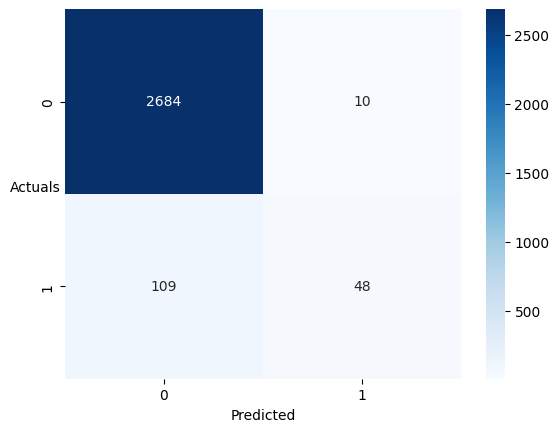

In [575]:
print(metrics.classification_report(y_train,pred_train_rf))
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1328
           1       0.60      0.27      0.37        77

    accuracy                           0.95      1405
   macro avg       0.78      0.63      0.67      1405
weighted avg       0.94      0.95      0.94      1405



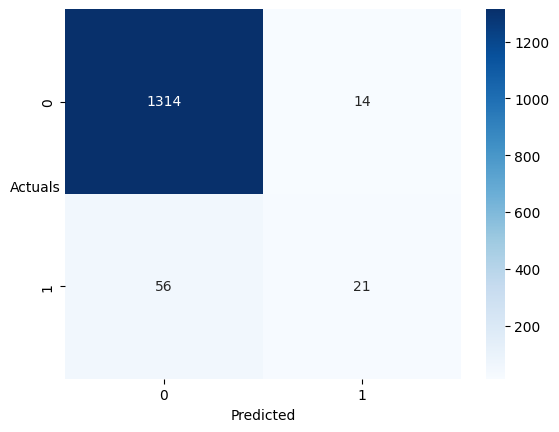

In [576]:


print(metrics.classification_report(y_test,pred_test_rf))

sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [114]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = .75)
X_res, y_res = sm.fit_resample(X_train_copy, y_train)

In [115]:
y_train.value_counts()

Default
0    2694
1     157
Name: count, dtype: int64

In [116]:
y_res.value_counts()

Default
0    2694
1    2020
Name: count, dtype: int64

In [580]:
# Define objective function
def objective_rf(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 25, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 60)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 100)
    

    # Create and fit random forest model
    model_rf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,n_jobs = -1
    )
    model_rf.fit(X_res, y_res)

    # Make predictions and calculate RMSE
    y_pred = model_rf.predict(X_test)
    
    return recall_score(y_test, y_pred)


In [581]:
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective_rf, n_trials=500, show_progress_bar=True,n_jobs = -1)

[I 2023-12-18 02:05:59,504] A new study created in memory with name: no-name-e50d7548-2e7b-4b6f-bf5b-e23ff4de7afe


[I 2023-12-18 02:06:00,038] Trial 0 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 3, 'min_samples_split': 53, 'min_samples_leaf': 61}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,052] Trial 6 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 16, 'max_depth': 2, 'min_samples_split': 47, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,054] Trial 8 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 10, 'max_depth': 2, 'min_samples_split': 59, 'min_samples_leaf': 38}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,071] Trial 4 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 13, 'max_depth': 3, 'min_samples_split': 26, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,072] Trial 7 finished with value: 0.8571428571428571 and parameters: 

Best trial: 0. Best value: 0.857143:   2%|▊                                            | 9/500 [00:00<00:36, 13.33it/s]

[I 2023-12-18 02:06:00,085] Trial 1 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,085] Trial 5 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 10, 'max_depth': 2, 'min_samples_split': 46, 'min_samples_leaf': 39}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,089] Trial 9 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 18, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 74}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,090] Trial 11 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 19, 'max_depth': 3, 'min_samples_split': 54, 'min_samples_leaf': 69}. Best is trial 0 with value: 0.8571428571428571.


Best trial: 0. Best value: 0.857143:   2%|▉                                           | 11/500 [00:01<00:36, 13.33it/s]

[I 2023-12-18 02:06:00,116] Trial 3 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 3, 'min_samples_split': 39, 'min_samples_leaf': 57}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,128] Trial 10 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.8571428571428571.


Best trial: 0. Best value: 0.857143:   3%|█▏                                          | 14/500 [00:01<00:39, 12.20it/s]

[I 2023-12-18 02:06:00,536] Trial 12 finished with value: 0.8051948051948052 and parameters: {'n_estimators': 13, 'max_depth': 2, 'min_samples_split': 32, 'min_samples_leaf': 58}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,681] Trial 13 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 14, 'max_depth': 4, 'min_samples_split': 54, 'min_samples_leaf': 91}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:00,683] Trial 14 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 96}. Best is trial 0 with value: 0.8571428571428571.


Best trial: 17. Best value: 0.87013:   3%|█▍                                          | 17/500 [00:01<00:40, 11.87it/s]

[I 2023-12-18 02:06:00,793] Trial 15 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 94}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:01,000] Trial 16 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 94}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:01,063] Trial 19 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8571428571428571.


Best trial: 17. Best value: 0.87013:   4%|█▊                                          | 20/500 [00:01<00:38, 12.40it/s]

[I 2023-12-18 02:06:01,071] Trial 18 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-12-18 02:06:01,084] Trial 17 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 98}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,186] Trial 21 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 99}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:   5%|██                                          | 24/500 [00:02<00:35, 13.40it/s]

[I 2023-12-18 02:06:01,261] Trial 20 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 98}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,325] Trial 22 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 98}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,465] Trial 23 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 6}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,509] Trial 24 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 5}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:   5%|██▍                                         | 27/500 [00:02<00:34, 13.71it/s]

[I 2023-12-18 02:06:01,584] Trial 25 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 48, 'min_samples_leaf': 76}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,600] Trial 26 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 46, 'min_samples_leaf': 3}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,624] Trial 27 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 19, 'max_depth': 4, 'min_samples_split': 49, 'min_samples_leaf': 7}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:01,743] Trial 28 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 47, 'min_samples_leaf': 79}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:01,828] Trial 29 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 47, 'min_samples_leaf': 81}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:   6%|██▊                                         | 32/500 [00:02<00:35, 13.04it/s]

[I 2023-12-18 02:06:01,871] Trial 30 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 47, 'min_samples_leaf': 77}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,038] Trial 32 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 26, 'min_samples_leaf': 77}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,050] Trial 31 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 27, 'min_samples_leaf': 82}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:02,208] Trial 34 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 4, 'min_samples_split': 27, 'min_samples_leaf': 82}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,210] Trial 33 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 25, 'min_samples_leaf': 84}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,336] Trial 35 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 25, 'min_samples_leaf': 85}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:02,345] Trial 36 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 27, 'min_samples_leaf': 86}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,464] Trial 38 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 25, 'min_samples_leaf': 85}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:   8%|███▌                                        | 40/500 [00:03<00:35, 12.89it/s]

[I 2023-12-18 02:06:02,515] Trial 37 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 85}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,616] Trial 39 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 86}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,636] Trial 40 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 85}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:02,848] Trial 41 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 88}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,857] Trial 42 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 53, 'min_samples_leaf': 87}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:02,989] Trial 43 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 88}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:   9%|████                                        | 46/500 [00:03<00:35, 12.73it/s]

[I 2023-12-18 02:06:03,021] Trial 46 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 67}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,101] Trial 44 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 89}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,121] Trial 45 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 65}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  10%|████▎                                       | 49/500 [00:04<00:33, 13.56it/s]

[I 2023-12-18 02:06:03,237] Trial 47 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 3, 'min_samples_split': 42, 'min_samples_leaf': 67}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,238] Trial 48 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 17, 'max_depth': 3, 'min_samples_split': 40, 'min_samples_leaf': 65}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,396] Trial 50 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 40, 'min_samples_leaf': 48}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  10%|████▌                                       | 52/500 [00:04<00:35, 12.76it/s]

[I 2023-12-18 02:06:03,431] Trial 49 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 42, 'min_samples_leaf': 44}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,593] Trial 51 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 42, 'min_samples_leaf': 47}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,610] Trial 52 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 47}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  11%|████▉                                       | 56/500 [00:04<00:31, 14.01it/s]

[I 2023-12-18 02:06:03,763] Trial 54 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 45}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,768] Trial 53 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 48}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,875] Trial 55 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 21, 'min_samples_leaf': 30}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:03,941] Trial 56 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 46}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  12%|█████▏                                      | 59/500 [00:04<00:32, 13.72it/s]

[I 2023-12-18 02:06:04,023] Trial 57 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 2, 'min_samples_split': 60, 'min_samples_leaf': 45}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,027] Trial 58 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 25, 'max_depth': 2, 'min_samples_split': 16, 'min_samples_leaf': 44}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,146] Trial 59 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 25}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  12%|█████▍                                      | 62/500 [00:04<00:29, 14.98it/s]

[I 2023-12-18 02:06:04,165] Trial 60 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 14, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 32}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,278] Trial 62 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 14, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 30}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,283] Trial 61 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 19, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 33}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:04,436] Trial 64 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 28}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,482] Trial 63 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 30}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,550] Trial 65 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 100}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  14%|█████▉                                      | 68/500 [00:05<00:31, 13.72it/s]

[I 2023-12-18 02:06:04,582] Trial 66 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 36}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,741] Trial 67 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 100}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,783] Trial 68 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 31}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:04,888] Trial 69 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 54}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:04,923] Trial 70 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 100}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:05,093] Trial 71 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 57}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,096] Trial 72 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 100}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,121] Trial 73 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 56}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,202] Trial 74 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 100}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:05,384] Trial 76 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 15}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,442] Trial 75 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 55}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:05,553] Trial 77 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 57}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,593] Trial 78 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 58}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  16%|███████▏                                    | 81/500 [00:06<00:36, 11.53it/s]

[I 2023-12-18 02:06:05,743] Trial 79 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 13}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,762] Trial 80 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 31, 'min_samples_leaf': 17}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:05,902] Trial 82 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 55, 'min_samples_leaf': 93}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:05,912] Trial 81 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 56, 'min_samples_leaf': 14}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,040] Trial 83 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 56, 'min_samples_leaf': 16}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,112] Trial 86 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 53, 'min_samples_leaf': 94}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  17%|███████▋                                    | 87/500 [00:06<00:32, 12.68it/s]

[I 2023-12-18 02:06:06,119] Trial 85 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 56, 'min_samples_leaf': 73}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,120] Trial 84 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 57, 'min_samples_leaf': 15}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,271] Trial 87 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 3, 'min_samples_split': 53, 'min_samples_leaf': 94}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  18%|███████▉                                    | 90/500 [00:07<00:32, 12.48it/s]

[I 2023-12-18 02:06:06,279] Trial 88 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 20, 'max_depth': 3, 'min_samples_split': 57, 'min_samples_leaf': 95}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,474] Trial 89 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 19, 'max_depth': 3, 'min_samples_split': 57, 'min_samples_leaf': 94}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,584] Trial 90 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 20, 'max_depth': 3, 'min_samples_split': 53, 'min_samples_leaf': 95}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  19%|████████▎                                   | 94/500 [00:07<00:29, 13.95it/s]

[I 2023-12-18 02:06:06,652] Trial 92 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 51, 'min_samples_leaf': 96}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,700] Trial 91 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 20, 'max_depth': 3, 'min_samples_split': 56, 'min_samples_leaf': 92}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,815] Trial 93 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 13, 'max_depth': 4, 'min_samples_split': 52, 'min_samples_leaf': 72}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,841] Trial 94 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 53, 'min_samples_leaf': 72}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  19%|████████▌                                   | 97/500 [00:07<00:29, 13.53it/s]

[I 2023-12-18 02:06:06,872] Trial 95 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 49, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:06,956] Trial 96 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 52, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,057] Trial 98 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 13, 'max_depth': 4, 'min_samples_split': 45, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  20%|████████▋                                   | 99/500 [00:07<00:30, 13.26it/s]

[I 2023-12-18 02:06:07,136] Trial 97 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 13, 'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,331] Trial 100 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 13, 'max_depth': 4, 'min_samples_split': 49, 'min_samples_leaf': 73}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  20%|████████▊                                  | 102/500 [00:08<00:33, 11.86it/s]

[I 2023-12-18 02:06:07,339] Trial 99 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 13, 'max_depth': 4, 'min_samples_split': 51, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,456] Trial 102 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 45, 'min_samples_leaf': 73}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,492] Trial 101 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 91}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:07,542] Trial 103 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 36, 'min_samples_leaf': 90}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,615] Trial 104 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 45, 'min_samples_leaf': 90}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,745] Trial 105 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 63}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  22%|█████████▎                                 | 108/500 [00:08<00:30, 12.79it/s]

[I 2023-12-18 02:06:07,768] Trial 106 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 90}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,874] Trial 107 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 61}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:07,952] Trial 108 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 97}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  22%|█████████▍                                 | 110/500 [00:08<00:31, 12.39it/s]

[I 2023-12-18 02:06:08,085] Trial 109 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 97}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,181] Trial 110 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 61}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  23%|█████████▋                                 | 113/500 [00:09<00:36, 10.55it/s]

[I 2023-12-18 02:06:08,363] Trial 111 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 61}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,388] Trial 112 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 68}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,524] Trial 113 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 61}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:08,539] Trial 114 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 63}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,620] Trial 115 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 98}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,633] Trial 116 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 97}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  24%|██████████▏                                | 119/500 [00:09<00:31, 12.13it/s]

[I 2023-12-18 02:06:08,816] Trial 117 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 51}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,876] Trial 118 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 97}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:08,969] Trial 120 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 51}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  24%|██████████▍                                | 122/500 [00:09<00:31, 12.18it/s]

[I 2023-12-18 02:06:09,028] Trial 119 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,121] Trial 122 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 51}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,144] Trial 121 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  25%|██████████▋                                | 124/500 [00:10<00:36, 10.17it/s]

[I 2023-12-18 02:06:09,430] Trial 123 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,438] Trial 124 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 88}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  25%|██████████▉                                | 127/500 [00:10<00:38,  9.72it/s]

[I 2023-12-18 02:06:09,641] Trial 126 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,676] Trial 125 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 52}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,687] Trial 127 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 52}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:09,808] Trial 128 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 68}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,905] Trial 130 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 68}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:09,908] Trial 129 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  27%|███████████▍                               | 133/500 [00:10<00:28, 13.08it/s]

[I 2023-12-18 02:06:10,076] Trial 131 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 11}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:10,140] Trial 132 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 23}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:10,248] Trial 134 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 22}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:10,260] Trial 133 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:10,430] Trial 136 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 22}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  27%|███████████▊                               | 137/500 [00:11<00:32, 11.20it/s]

[I 2023-12-18 02:06:10,433] Trial 135 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 20}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  28%|███████████▉                               | 139/500 [00:11<00:41,  8.73it/s]

[I 2023-12-18 02:06:10,764] Trial 137 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:10,903] Trial 138 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 22}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:10,926] Trial 139 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  29%|████████████▎                              | 143/500 [00:11<00:31, 11.43it/s]

[I 2023-12-18 02:06:10,973] Trial 140 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,003] Trial 142 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,039] Trial 141 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 68}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,106] Trial 143 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  29%|████████████▋                              | 147/500 [00:11<00:25, 13.76it/s]

[I 2023-12-18 02:06:11,196] Trial 144 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,208] Trial 145 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,250] Trial 146 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 70}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,268] Trial 147 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  30%|████████████▋                              | 148/500 [00:12<00:24, 14.09it/s]

[I 2023-12-18 02:06:11,472] Trial 148 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 69}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  30%|█████████████                              | 152/500 [00:12<00:32, 10.56it/s]

[I 2023-12-18 02:06:11,794] Trial 149 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 78}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,883] Trial 150 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 79}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:11,919] Trial 151 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 78}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  31%|█████████████▎                             | 155/500 [00:12<00:30, 11.16it/s]

[I 2023-12-18 02:06:12,039] Trial 152 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 76}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,063] Trial 153 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 76}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,137] Trial 155 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 66}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,205] Trial 157 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 75}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:12,251] Trial 156 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 78}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,257] Trial 154 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 76}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,394] Trial 158 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 99}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  32%|█████████████▊                             | 160/500 [00:13<00:27, 12.59it/s]

[I 2023-12-18 02:06:12,461] Trial 160 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 76}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,515] Trial 159 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 65}. Best is trial 17 with value: 0.8701298701298701.


[I 2023-12-18 02:06:12,792] Trial 161 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 75}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:12,875] Trial 163 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  33%|██████████████▏                            | 165/500 [00:13<00:33, 10.02it/s]

[I 2023-12-18 02:06:12,984] Trial 162 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,095] Trial 164 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 64}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,150] Trial 166 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 19}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  34%|██████████████▌                            | 169/500 [00:13<00:25, 12.91it/s]

[I 2023-12-18 02:06:13,153] Trial 165 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 64}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,270] Trial 167 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,337] Trial 168 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 20}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,347] Trial 170 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 64}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 17. Best value: 0.87013:  35%|██████████████▉                            | 173/500 [00:14<00:24, 13.18it/s]

[I 2023-12-18 02:06:13,347] Trial 169 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 64}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,530] Trial 172 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 20}. Best is trial 17 with value: 0.8701298701298701.
[I 2023-12-18 02:06:13,631] Trial 171 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 20}. Best is trial 17 with value: 0.8701298701298701.


Best trial: 173. Best value: 0.883117:  35%|██████████████▎                          | 175/500 [00:14<00:35,  9.23it/s]

[I 2023-12-18 02:06:13,947] Trial 173 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,001] Trial 174 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,053] Trial 175 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:14,181] Trial 176 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,231] Trial 178 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,380] Trial 177 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  36%|██████████████▊                          | 181/500 [00:15<00:28, 11.28it/s]

[I 2023-12-18 02:06:14,405] Trial 179 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,496] Trial 180 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 71}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,524] Trial 181 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  37%|███████████████                          | 183/500 [00:15<00:26, 11.99it/s]

[I 2023-12-18 02:06:14,530] Trial 183 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 71}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:14,583] Trial 182 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  37%|███████████████▏                         | 185/500 [00:15<00:33,  9.53it/s]

[I 2023-12-18 02:06:14,640] Trial 184 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 32, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,071] Trial 185 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 40}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  38%|███████████████▍                         | 188/500 [00:15<00:35,  8.87it/s]

[I 2023-12-18 02:06:15,229] Trial 187 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 96}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,240] Trial 186 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 98}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,297] Trial 188 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:15,341] Trial 189 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,415] Trial 190 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,554] Trial 191 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:15,631] Trial 192 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,680] Trial 193 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,793] Trial 195 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  39%|████████████████▏                        | 197/500 [00:16<00:23, 13.10it/s]

[I 2023-12-18 02:06:15,794] Trial 194 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,937] Trial 196 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 39}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:15,952] Trial 197 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:16,229] Trial 198 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 10}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,282] Trial 199 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 10}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  40%|████████████████▌                        | 202/500 [00:17<00:30,  9.90it/s]

[I 2023-12-18 02:06:16,413] Trial 201 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,494] Trial 200 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,515] Trial 202 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:16,638] Trial 203 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,731] Trial 205 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,738] Trial 206 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  42%|█████████████████▏                       | 210/500 [00:17<00:17, 16.33it/s]

[I 2023-12-18 02:06:16,751] Trial 204 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,798] Trial 207 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 93}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,921] Trial 209 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:16,924] Trial 208 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 83}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  42%|█████████████████▍                       | 212/500 [00:17<00:22, 12.77it/s]

[I 2023-12-18 02:06:17,129] Trial 210 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,146] Trial 211 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  43%|█████████████████▌                       | 214/500 [00:18<00:27, 10.28it/s]

[I 2023-12-18 02:06:17,391] Trial 212 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 1}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,414] Trial 213 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,551] Trial 214 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  44%|█████████████████▉                       | 218/500 [00:18<00:23, 12.00it/s]

[I 2023-12-18 02:06:17,682] Trial 215 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 93}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,718] Trial 217 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 2}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,749] Trial 216 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,819] Trial 218 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  44%|██████████████████▏                      | 222/500 [00:18<00:19, 14.11it/s]

[I 2023-12-18 02:06:17,830] Trial 219 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,955] Trial 221 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:17,972] Trial 220 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  45%|██████████████████▎                      | 224/500 [00:18<00:25, 10.81it/s]

[I 2023-12-18 02:06:18,199] Trial 222 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:18,298] Trial 223 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  45%|██████████████████▌                      | 226/500 [00:19<00:26, 10.16it/s]

[I 2023-12-18 02:06:18,450] Trial 224 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 8}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:18,503] Trial 225 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:18,506] Trial 226 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  46%|██████████████████▊                      | 229/500 [00:19<00:24, 10.87it/s]

[I 2023-12-18 02:06:18,657] Trial 227 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:18,710] Trial 228 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:18,869] Trial 230 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:18,875] Trial 229 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,001] Trial 231 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,043] Trial 232 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  47%|███████████████████▎                     | 235/500 [00:19<00:18, 13.96it/s]

[I 2023-12-18 02:06:19,091] Trial 234 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,110] Trial 233 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  47%|███████████████████▍                     | 237/500 [00:20<00:26,  9.88it/s]

[I 2023-12-18 02:06:19,388] Trial 235 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,519] Trial 236 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,538] Trial 237 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  48%|███████████████████▊                     | 241/500 [00:20<00:22, 11.56it/s]

[I 2023-12-18 02:06:19,590] Trial 238 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,603] Trial 239 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,792] Trial 240 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  49%|████████████████████                     | 244/500 [00:20<00:23, 10.86it/s]

[I 2023-12-18 02:06:19,931] Trial 241 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:19,941] Trial 242 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,038] Trial 243 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,108] Trial 244 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  49%|████████████████████▎                    | 247/500 [00:20<00:21, 12.04it/s]

[I 2023-12-18 02:06:20,186] Trial 246 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,273] Trial 245 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  50%|████████████████████▍                    | 249/500 [00:21<00:23, 10.63it/s]

[I 2023-12-18 02:06:20,422] Trial 247 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,522] Trial 248 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,563] Trial 249 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  50%|████████████████████▋                    | 252/500 [00:21<00:22, 11.21it/s]

[I 2023-12-18 02:06:20,695] Trial 251 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,779] Trial 250 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:20,822] Trial 252 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  51%|████████████████████▉                    | 255/500 [00:21<00:23, 10.26it/s]

[I 2023-12-18 02:06:21,003] Trial 253 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,052] Trial 254 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,154] Trial 255 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  52%|█████████████████████▏                   | 259/500 [00:21<00:19, 12.33it/s]

[I 2023-12-18 02:06:21,215] Trial 257 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,259] Trial 256 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,299] Trial 258 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  52%|█████████████████████▎                   | 260/500 [00:22<00:19, 12.33it/s]

[I 2023-12-18 02:06:21,414] Trial 259 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,610] Trial 260 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  53%|█████████████████████▌                   | 263/500 [00:22<00:21, 10.87it/s]

[I 2023-12-18 02:06:21,639] Trial 261 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,757] Trial 262 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:21,832] Trial 263 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  53%|█████████████████████▊                   | 266/500 [00:22<00:22, 10.56it/s]

[I 2023-12-18 02:06:21,949] Trial 264 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,006] Trial 265 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,138] Trial 266 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:22,162] Trial 267 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,246] Trial 269 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,297] Trial 268 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  54%|██████████████████████▏                  | 271/500 [00:22<00:17, 13.36it/s]

[I 2023-12-18 02:06:22,332] Trial 270 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,407] Trial 271 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:22,699] Trial 272 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 24, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,756] Trial 273 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:22,878] Trial 275 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:22,948] Trial 274 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  56%|██████████████████████▉                  | 279/500 [00:23<00:19, 11.35it/s]

[I 2023-12-18 02:06:23,077] Trial 277 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,095] Trial 276 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,193] Trial 279 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,211] Trial 278 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  57%|███████████████████████▏                 | 283/500 [00:24<00:16, 13.48it/s]

[I 2023-12-18 02:06:23,320] Trial 281 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,369] Trial 280 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 24, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,395] Trial 282 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  57%|███████████████████████▏                 | 283/500 [00:24<00:16, 13.48it/s]

[I 2023-12-18 02:06:23,576] Trial 283 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 14}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  57%|███████████████████████▍                 | 286/500 [00:24<00:21,  9.84it/s]

[I 2023-12-18 02:06:23,778] Trial 284 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,816] Trial 285 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:23,953] Trial 286 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  58%|███████████████████████▋                 | 289/500 [00:24<00:20, 10.48it/s]

[I 2023-12-18 02:06:23,986] Trial 287 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,146] Trial 289 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,164] Trial 288 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  59%|████████████████████████                 | 293/500 [00:25<00:16, 12.22it/s]

[I 2023-12-18 02:06:24,332] Trial 291 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,343] Trial 290 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,398] Trial 293 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,409] Trial 292 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  59%|████████████████████████▏                | 295/500 [00:25<00:15, 13.47it/s]

[I 2023-12-18 02:06:24,485] Trial 294 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,531] Trial 295 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:24,843] Trial 296 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,880] Trial 297 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:24,963] Trial 298 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  60%|████████████████████████▋                | 301/500 [00:25<00:15, 12.52it/s]

[I 2023-12-18 02:06:25,049] Trial 299 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,104] Trial 300 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,157] Trial 301 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 34}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:25,336] Trial 302 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,367] Trial 303 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 35}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,487] Trial 304 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  61%|█████████████████████████▏               | 307/500 [00:26<00:15, 12.84it/s]

[I 2023-12-18 02:06:25,502] Trial 307 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,518] Trial 305 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 34}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,530] Trial 306 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  62%|█████████████████████████▌               | 311/500 [00:26<00:17, 10.75it/s]

[I 2023-12-18 02:06:25,900] Trial 309 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,961] Trial 308 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:25,984] Trial 311 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  63%|█████████████████████████▋               | 313/500 [00:26<00:15, 12.09it/s]

[I 2023-12-18 02:06:26,123] Trial 313 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,124] Trial 310 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,131] Trial 312 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:26,398] Trial 315 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,476] Trial 314 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  64%|██████████████████████████▏              | 319/500 [00:27<00:15, 11.73it/s]

[I 2023-12-18 02:06:26,569] Trial 316 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,609] Trial 317 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,702] Trial 318 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:26,801] Trial 319 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:26,928] Trial 320 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:26,943] Trial 321 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,136] Trial 323 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 4}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  65%|██████████████████████████▋              | 325/500 [00:27<00:15, 11.11it/s]

[I 2023-12-18 02:06:27,172] Trial 322 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,253] Trial 324 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,309] Trial 325 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  65%|██████████████████████████▊              | 327/500 [00:28<00:14, 12.07it/s]

[I 2023-12-18 02:06:27,411] Trial 326 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,530] Trial 327 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  66%|███████████████████████████▏             | 331/500 [00:28<00:14, 11.33it/s]

[I 2023-12-18 02:06:27,719] Trial 329 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,745] Trial 328 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,777] Trial 331 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 26, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:27,881] Trial 330 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  67%|███████████████████████████▎             | 333/500 [00:28<00:14, 11.87it/s]

[I 2023-12-18 02:06:27,933] Trial 332 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,073] Trial 333 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  67%|███████████████████████████▋             | 337/500 [00:28<00:14, 11.22it/s]

[I 2023-12-18 02:06:28,271] Trial 334 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 26, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,328] Trial 335 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,399] Trial 337 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,445] Trial 338 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 31}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  68%|███████████████████████████▊             | 339/500 [00:29<00:14, 11.46it/s]

[I 2023-12-18 02:06:28,508] Trial 336 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 8}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,558] Trial 339 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  69%|████████████████████████████▏            | 343/500 [00:29<00:14, 10.83it/s]

[I 2023-12-18 02:06:28,844] Trial 341 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 6}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,867] Trial 340 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,872] Trial 343 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:28,882] Trial 342 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  69%|████████████████████████████▎            | 346/500 [00:29<00:11, 13.72it/s]

[I 2023-12-18 02:06:28,904] Trial 344 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 8}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:29,020] Trial 345 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:29,196] Trial 347 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 6}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:29,236] Trial 346 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 31}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:29,302] Trial 348 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  70%|████████████████████████████▋            | 350/500 [00:30<00:12, 11.77it/s]

[I 2023-12-18 02:06:29,455] Trial 351 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:29,556] Trial 349 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  70%|████████████████████████████▊            | 352/500 [00:30<00:14, 10.30it/s]

[I 2023-12-18 02:06:29,704] Trial 350 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  71%|█████████████████████████████            | 355/500 [00:30<00:16,  8.84it/s]

[I 2023-12-18 02:06:29,971] Trial 353 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:29,999] Trial 352 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,023] Trial 354 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,059] Trial 355 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  72%|█████████████████████████████▍           | 359/500 [00:30<00:11, 12.46it/s]

[I 2023-12-18 02:06:30,122] Trial 356 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,179] Trial 358 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,201] Trial 359 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,225] Trial 357 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  72%|█████████████████████████████▌           | 361/500 [00:31<00:11, 12.46it/s]

[I 2023-12-18 02:06:30,373] Trial 360 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,547] Trial 362 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  73%|█████████████████████████████▊           | 364/500 [00:31<00:11, 12.13it/s]

[I 2023-12-18 02:06:30,552] Trial 361 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:30,693] Trial 363 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  73%|██████████████████████████████           | 366/500 [00:31<00:14,  8.99it/s]

[I 2023-12-18 02:06:30,943] Trial 364 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,094] Trial 365 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,122] Trial 366 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 42}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:31,151] Trial 367 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 20, 'max_depth': 2, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,253] Trial 369 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,253] Trial 368 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,298] Trial 370 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  74%|██████████████████████████████▌          | 372/500 [00:31<00:09, 13.30it/s]

[I 2023-12-18 02:06:31,317] Trial 371 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 18, 'max_depth': 2, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,341] Trial 372 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 18, 'max_depth': 2, 'min_samples_split': 38, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  75%|██████████████████████████████▋          | 374/500 [00:32<00:10, 12.36it/s]

[I 2023-12-18 02:06:31,590] Trial 373 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 24, 'max_depth': 2, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:31,607] Trial 374 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:31,847] Trial 375 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:32,055] Trial 376 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  76%|███████████████████████████████▏         | 380/500 [00:32<00:12,  9.68it/s]

[I 2023-12-18 02:06:32,244] Trial 377 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,299] Trial 378 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,344] Trial 379 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,357] Trial 380 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  77%|███████████████████████████████▍         | 384/500 [00:33<00:09, 11.92it/s]

[I 2023-12-18 02:06:32,359] Trial 381 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,449] Trial 382 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,546] Trial 383 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 12}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,571] Trial 384 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  77%|███████████████████████████████▋         | 387/500 [00:33<00:08, 13.82it/s]

[I 2023-12-18 02:06:32,734] Trial 386 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:32,739] Trial 385 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  77%|███████████████████████████████▋         | 387/500 [00:33<00:08, 13.82it/s]

[I 2023-12-18 02:06:32,948] Trial 387 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  78%|███████████████████████████████▉         | 389/500 [00:33<00:12,  8.78it/s]

[I 2023-12-18 02:06:33,175] Trial 388 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,288] Trial 389 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  79%|████████████████████████████████▏        | 393/500 [00:34<00:10,  9.85it/s]

[I 2023-12-18 02:06:33,450] Trial 390 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,457] Trial 391 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,506] Trial 392 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,529] Trial 393 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  80%|████████████████████████████████▋        | 398/500 [00:34<00:07, 13.84it/s]

[I 2023-12-18 02:06:33,629] Trial 395 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,631] Trial 394 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,714] Trial 396 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,776] Trial 397 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:33,803] Trial 398 finished with value: 0.844155844155844

Best trial: 173. Best value: 0.883117:  80%|████████████████████████████████▊        | 400/500 [00:34<00:07, 13.60it/s]

[I 2023-12-18 02:06:33,995] Trial 399 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,090] Trial 400 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  80%|████████████████████████████████▉        | 402/500 [00:35<00:09,  9.94it/s]

[I 2023-12-18 02:06:34,316] Trial 401 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,502] Trial 403 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  81%|█████████████████████████████████▎       | 406/500 [00:35<00:08, 10.92it/s]

[I 2023-12-18 02:06:34,581] Trial 402 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,594] Trial 404 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,648] Trial 405 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 44, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,672] Trial 406 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 28}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:34,751] Trial 407 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 37}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,761] Trial 409 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 10, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,824] Trial 408 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:34,890] Trial 410 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  83%|█████████████████████████████████▊       | 413/500 [00:35<00:06, 13.84it/s]

[I 2023-12-18 02:06:34,989] Trial 411 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 17, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,112] Trial 412 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 42, 'min_samples_leaf': 29}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:35,216] Trial 413 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 29, 'min_samples_leaf': 30}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  83%|██████████████████████████████████       | 415/500 [00:36<00:08,  9.59it/s]

[I 2023-12-18 02:06:35,433] Trial 414 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 28, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,611] Trial 415 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  84%|██████████████████████████████████▎      | 419/500 [00:36<00:07, 10.24it/s]

[I 2023-12-18 02:06:35,661] Trial 416 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,787] Trial 418 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,795] Trial 417 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,885] Trial 421 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  85%|██████████████████████████████████▋      | 423/500 [00:36<00:06, 12.27it/s]

[I 2023-12-18 02:06:35,894] Trial 419 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,898] Trial 420 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:35,998] Trial 422 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,048] Trial 423 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  85%|██████████████████████████████████▊      | 424/500 [00:36<00:05, 13.59it/s]

[I 2023-12-18 02:06:36,112] Trial 424 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  85%|██████████████████████████████████▉      | 426/500 [00:37<00:07, 10.09it/s]

[I 2023-12-18 02:06:36,421] Trial 425 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,486] Trial 426 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  86%|███████████████████████████████████▎     | 430/500 [00:37<00:06, 11.26it/s]

[I 2023-12-18 02:06:36,660] Trial 428 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,666] Trial 427 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,745] Trial 429 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  86%|███████████████████████████████████▍     | 432/500 [00:37<00:06, 11.02it/s]

[I 2023-12-18 02:06:36,903] Trial 431 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,969] Trial 430 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:36,974] Trial 432 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  87%|███████████████████████████████████▊     | 436/500 [00:37<00:05, 12.78it/s]

[I 2023-12-18 02:06:37,119] Trial 433 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,127] Trial 434 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,228] Trial 435 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 21}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,239] Trial 436 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  88%|████████████████████████████████████     | 440/500 [00:38<00:06,  9.62it/s]

[I 2023-12-18 02:06:37,632] Trial 437 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 34, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,656] Trial 438 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,784] Trial 439 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 33, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,811] Trial 440 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  89%|████████████████████████████████████▍    | 444/500 [00:38<00:04, 11.67it/s]

[I 2023-12-18 02:06:37,839] Trial 441 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 15}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:37,987] Trial 443 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 36, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,018] Trial 442 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 22, 'max_depth': 4, 'min_samples_split': 36, 'min_samples_leaf': 16}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  89%|████████████████████████████████████▌    | 446/500 [00:38<00:04, 11.67it/s]

[I 2023-12-18 02:06:38,143] Trial 444 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,248] Trial 446 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,272] Trial 445 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  90%|████████████████████████████████████▋    | 448/500 [00:38<00:04, 12.33it/s]

[I 2023-12-18 02:06:38,351] Trial 447 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 17}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,376] Trial 448 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 18}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:38,789] Trial 450 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 27}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,872] Trial 449 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,886] Trial 451 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:38,956] Trial 453 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 23, 'max_depth': 4, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.


[I 2023-12-18 02:06:38,984] Trial 454 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 16, 'max_depth': 5, 'min_samples_split': 60, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,002] Trial 452 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,057] Trial 456 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 18, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  92%|█████████████████████████████████████▋   | 459/500 [00:39<00:03, 12.85it/s]

[I 2023-12-18 02:06:39,080] Trial 455 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 23, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,321] Trial 458 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,341] Trial 457 finished with value: 0.8051948051948052 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  92%|█████████████████████████████████████▊   | 461/500 [00:40<00:03, 11.58it/s]

[I 2023-12-18 02:06:39,495] Trial 459 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,554] Trial 460 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 26}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  93%|█████████████████████████████████████▉   | 463/500 [00:40<00:04,  8.76it/s]

[I 2023-12-18 02:06:39,834] Trial 461 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 25}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,929] Trial 462 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:39,989] Trial 463 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 12, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  93%|██████████████████████████████████████▎  | 467/500 [00:40<00:03, 10.66it/s]

[I 2023-12-18 02:06:40,089] Trial 464 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,109] Trial 465 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 38, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,170] Trial 468 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 13, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,263] Trial 467 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  94%|██████████████████████████████████████▌  | 470/500 [00:41<00:02, 11.97it/s]

[I 2023-12-18 02:06:40,302] Trial 466 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,457] Trial 469 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 19}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,537] Trial 470 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 24, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  95%|██████████████████████████████████████▊  | 473/500 [00:41<00:02, 11.28it/s]

[I 2023-12-18 02:06:40,630] Trial 471 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:40,676] Trial 472 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 22, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  95%|██████████████████████████████████████▉  | 475/500 [00:41<00:02,  8.48it/s]

[I 2023-12-18 02:06:40,958] Trial 474 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,073] Trial 473 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  95%|███████████████████████████████████████  | 477/500 [00:41<00:02,  9.61it/s]

[I 2023-12-18 02:06:41,213] Trial 475 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 20}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,220] Trial 476 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,358] Trial 477 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  96%|███████████████████████████████████████▍ | 481/500 [00:42<00:01, 11.31it/s]

[I 2023-12-18 02:06:41,437] Trial 480 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,442] Trial 478 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,459] Trial 479 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 25, 'max_depth': 5, 'min_samples_split': 41, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,536] Trial 481 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  97%|███████████████████████████████████████▌ | 483/500 [00:42<00:01, 11.61it/s]

[I 2023-12-18 02:06:41,693] Trial 482 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 23}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:41,850] Trial 483 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 10}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  97%|███████████████████████████████████████▊ | 486/500 [00:42<00:01, 10.04it/s]

[I 2023-12-18 02:06:41,987] Trial 484 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,065] Trial 485 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 49}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,161] Trial 488 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  98%|████████████████████████████████████████ | 489/500 [00:42<00:01, 10.95it/s]

[I 2023-12-18 02:06:42,204] Trial 487 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 19, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,266] Trial 486 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 24}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  98%|████████████████████████████████████████▎| 491/500 [00:43<00:00,  9.77it/s]

[I 2023-12-18 02:06:42,425] Trial 489 finished with value: 0.8571428571428571 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 40, 'min_samples_leaf': 10}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,568] Trial 490 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,584] Trial 491 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 9}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117:  99%|████████████████████████████████████████▌| 495/500 [00:43<00:00, 12.88it/s]

[I 2023-12-18 02:06:42,607] Trial 493 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 31, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,668] Trial 492 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 39, 'min_samples_leaf': 3}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,749] Trial 494 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 4}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,862] Trial 495 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 21, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 32}. Best is trial 173 with value: 0.8831168831168831.


Best trial: 173. Best value: 0.883117: 100%|█████████████████████████████████████████| 500/500 [00:43<00:00, 11.51it/s]

[I 2023-12-18 02:06:42,871] Trial 496 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 4}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,909] Trial 497 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,926] Trial 499 finished with value: 0.8831168831168831 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 22}. Best is trial 173 with value: 0.8831168831168831.
[I 2023-12-18 02:06:42,939] Trial 498 finished with value: 0.8181818181818182 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_split': 37, 'min_samples_leaf': 4}. Best is trial 173 with value: 0.8831168831168831.


In [582]:
best_rf_params = rf_study.best_params

In [583]:
best_rf_params

{'n_estimators': 25,
 'max_depth': 5,
 'min_samples_split': 40,
 'min_samples_leaf': 21}

In [117]:
param={'n_estimators': 16,
  'max_depth': 4,
 'min_samples_split': 13,
 'min_samples_leaf': 66}
best_rf_model = RandomForestClassifier(**param
    # n_estimators=best_rf_params['n_estimators'],
    #                                   max_depth=best_rf_params['max_depth'], min_samples_split=best_rf_params['min_samples_split'],
    # min_samples_leaf=best_rf_params['min_samples_leaf']
    ,random_state=42)
# {'n_estimators': 16,
#  'max_depth': 4,
#  'min_samples_split': 13,
#  'min_samples_leaf': 66}

# {'n_estimators': 16,
#  'max_depth': 4,
#  'min_samples_split': 22,
#  'min_samples_leaf': 67}
best_rf_model.fit(X_res, y_res)

RandomForestClassifier(max_depth=4, min_samples_leaf=66, min_samples_split=13,
                       n_estimators=16, random_state=42)

In [118]:


pred_train_smote = best_rf_model.predict(X_res)
pred_test_smote = best_rf_model.predict(X_test)


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2694
           1       0.85      0.88      0.86      2020

    accuracy                           0.88      4714
   macro avg       0.88      0.88      0.88      4714
weighted avg       0.88      0.88      0.88      4714



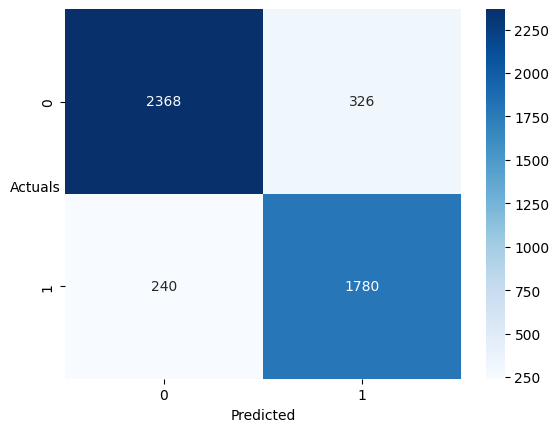

In [119]:
print(metrics.classification_report(y_res,pred_train_smote))
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_smote)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.956


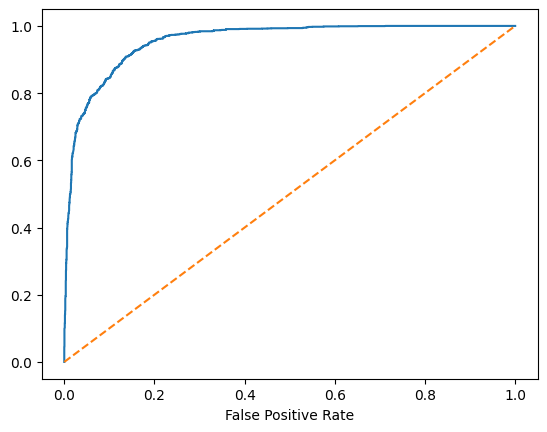

In [120]:


# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_train = best_rf_model.predict_proba(X_res)[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs_train)
print('AUC: %.3f' % auc)

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_res, probs_train)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_res, probs_train)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');



              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1328
           1       0.27      0.90      0.42        77

    accuracy                           0.86      1405
   macro avg       0.63      0.88      0.67      1405
weighted avg       0.95      0.86      0.90      1405



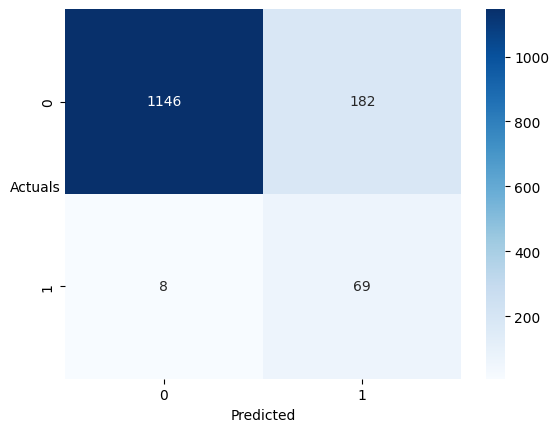

In [121]:


print(metrics.classification_report(y_test,pred_test_smote))

sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [122]:
recall_score(y_test,pred_test_smote)

0.8961038961038961

AUC: 0.939


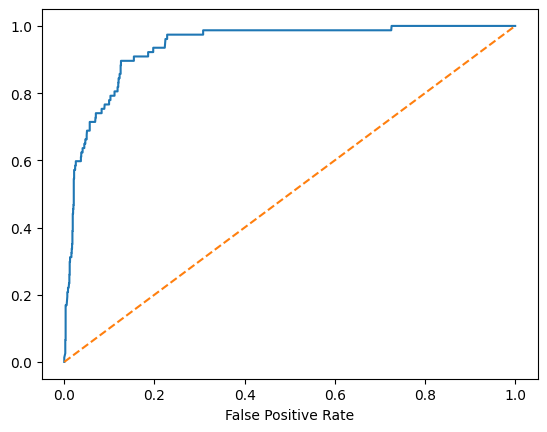

In [123]:


# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_test = best_rf_model.predict_proba(X_test)[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, probs_test)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');



Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

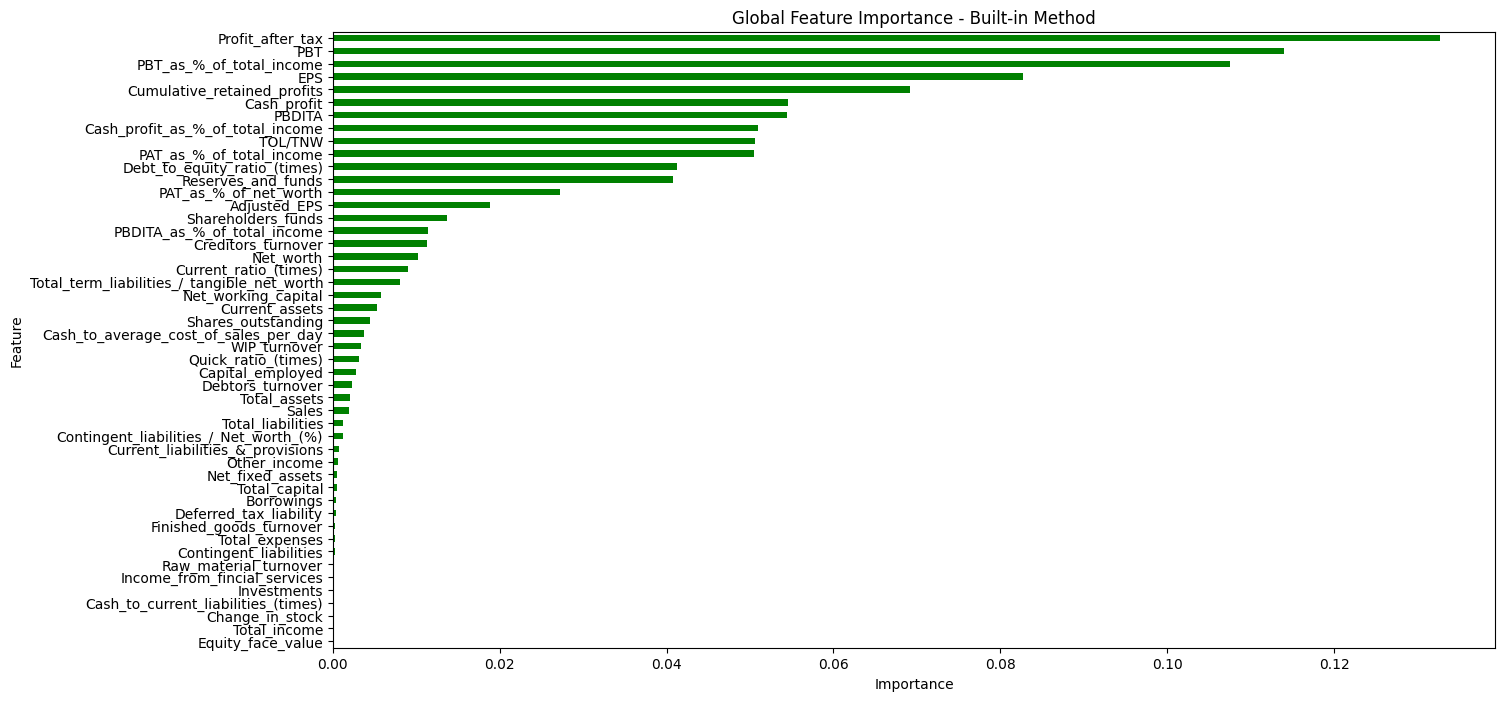

In [124]:
global_importances = pd.Series(best_rf_model.feature_importances_, index=X_res.columns)
global_importances.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(15,8))
global_importances.plot.barh(color='green')
# plt.figure(figsize=(20,8))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")